# Problem Statement:

The dataset represents various aspects of the supply chain process, including project details, shipment logistics, product information, and pricing. The goal is to leverage this data to identify trends, optimize operations, and support decision-making in supply chain management. Specifically, the problem could focus on one or more of the following:

### Cost Optimization:

Analyze the factors driving high freight costs, insurance, and overall shipment value.
Predict and recommend cost-efficient shipping methods or routes.
### Shipment Mode Prediction:

Develop a model to predict the most suitable shipment mode (Air, Sea, etc.) based on product characteristics, destination, and cost constraints.
### On-Time Delivery Prediction:

Predict whether a shipment will be delivered on time based on the provided dates, product details, and logistics factors.
Identify bottlenecks in the supply chain that impact delivery timelines.
### Pricing Analysis:

Investigate relationships between unit price, pack price, line item value, and shipment costs to detect inconsistencies or pricing inefficiencies.
### Demand and Supply Planning:

Use the product-related data (group, dosage form, etc.) to forecast demand and improve inventory management.
### Root Cause Analysis:

Perform exploratory data analysis (EDA) to uncover hidden patterns, such as frequent delays, inefficiencies, or outliers in shipping or cost data.

# Column names:
1) id: Unique identifier for the record.
2) project code, pq #, po / so #, asn/dn #: Project-related codes and identifiers.
3) country: Destination country.
4) managed by: Entity managing the shipment.
5) fulfill via: Method of fulfillment.
6) vendor inco term: INCOTERM used in the shipment.
7) shipment mode: Mode of transportation (e.g., Air, Sea).
8) Dates: Including pq first sent to client date, po sent to vendor date, etc.
9) Product information: product group, sub classification, item description, molecule/test type, brand, dosage, dosage form.
10) Pricing and quantity: unit of measure (per pack), line item quantity, line item value, pack price, unit price.
11) Logistics: manufacturing site, first line designation, weight (kilograms), freight cost (usd), line item insurance (usd).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,8]

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# Read the dataset
data = pd.read_csv('Supply_Chain_Shipment_Pricing_Data.csv')
data.head()

,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,pq first sent to client date,po sent to vendor date,scheduled delivery date,delivered to client date,delivery recorded date,product group,sub classification,vendor,item description,molecule/test type,brand,dosage,dosage form,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,NaN


In [4]:
df = data.copy()

## Basic Analysis

In [5]:
df.shape

(10324, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            10324 non-null  int64  
 1   project code                  10324 non-null  object 
 2   pq #                          10324 non-null  object 
 3   po / so #                     10324 non-null  object 
 4   asn/dn #                      10324 non-null  object 
 5   country                       10324 non-null  object 
 6   managed by                    10324 non-null  object 
 7   fulfill via                   10324 non-null  object 
 8   vendor inco term              10324 non-null  object 
 9   shipment mode                 9964 non-null   object 
 10  pq first sent to client date  10324 non-null  object 
 11  po sent to vendor date        10324 non-null  object 
 12  scheduled delivery date       10324 non-null  object 
 13  d

In [7]:
# There are 26 categorical columns and 7 numerical columns

In [8]:
# Removing unwanted columns
df1 = df.drop(['id','project code','pq #','po / so #','asn/dn #','pq first sent to client date','scheduled delivery date','po sent to vendor date','delivery recorded date',
              'vendor','item description','molecule/test type'],axis = 1)
df1

,country,managed by,fulfill via,vendor inco term,shipment mode,delivered to client date,product group,sub classification,brand,dosage,dosage form,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
0,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,2-Jun-06,HRDT,HIV test,Reveal,NaN,Test kit,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,NaN
1,Vietnam,PMO - US,Direct Drop,EXW,Air,14-Nov-06,ARV,Pediatric,Generic,10mg/ml,Oral suspension,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,NaN
2,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,27-Aug-06,HRDT,HIV test,Determine,NaN,Test kit,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,NaN
3,Vietnam,PMO - US,Direct Drop,EXW,Air,1-Sep-06,ARV,Adult,Generic,150mg,Tablet,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,NaN
4,Vietnam,PMO - US,Direct Drop,EXW,Air,11-Aug-06,ARV,Adult,Generic,30mg,Capsule,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,15-Jul-15,ARV,Pediatric,Generic,30/50/60mg,Chewable/dispersible tablet - FDC,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",False,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,6-Aug-15,ARV,Adult,Generic,150/300mg,Tablet - FDC,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,False,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,25-Aug-15,ARV,Adult,Generic,600/300/300mg,Tablet - FDC,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,False,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,4-Aug-15,ARV,Adult,Generic,150/300mg,Tablet - FDC,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,True,1392,Freight Included in Commodity Cost,134.03


In [9]:
# Converting the date column datatype from object to datetime
df1['delivered to client date'] = pd.to_datetime(df1['delivered to client date'])
df1['delivered to client date']

0       2006-06-02
1       2006-11-14
2       2006-08-27
3       2006-09-01
4       2006-08-11
           ...    
10319   2015-07-15
10320   2015-08-06
10321   2015-08-25
10322   2015-08-04
10323   2015-08-04
Name: delivered to client date, Length: 10324, dtype: datetime64[ns]

In [10]:
# Extracting year from the date column as seperate column
df1['delivered_year']= df1['delivered to client date'].dt.year
df1['delivered_year']

0        2006
1        2006
2        2006
3        2006
4        2006
         ... 
10319    2015
10320    2015
10321    2015
10322    2015
10323    2015
Name: delivered_year, Length: 10324, dtype: int32

In [11]:
df1['delivered_year'].unique()

array([2006, 2007, 2012, 2008, 2009, 2010, 2014, 2015, 2013, 2011])

In [12]:
# Dropping date column as it is not necessary after extracted year and month
df1 = df1.drop(columns = 'delivered to client date',axis = 1)

In [13]:
df1.head()

,country,managed by,fulfill via,vendor inco term,shipment mode,product group,sub classification,brand,dosage,dosage form,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd),delivered_year
0,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,HRDT,HIV test,Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,NaN,2006
1,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Pediatric,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,NaN,2006
2,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,HRDT,HIV test,Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,NaN,2006
3,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Adult,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,NaN,2006
4,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Adult,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,NaN,2006


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     10324 non-null  object 
 1   managed by                  10324 non-null  object 
 2   fulfill via                 10324 non-null  object 
 3   vendor inco term            10324 non-null  object 
 4   shipment mode               9964 non-null   object 
 5   product group               10324 non-null  object 
 6   sub classification          10324 non-null  object 
 7   brand                       10324 non-null  object 
 8   dosage                      8588 non-null   object 
 9   dosage form                 10324 non-null  object 
 10  unit of measure (per pack)  10324 non-null  int64  
 11  line item quantity          10324 non-null  int64  
 12  line item value             10324 non-null  float64
 13  pack price                  103

In [15]:
# Converting bool datatype to object datatype
df1['first line designation'] = df['first line designation'].astype('object')

In [16]:
# Split the categorical columns
cat_col = df1.select_dtypes(include = ['object']).columns.tolist()
cat_col

['country',
 'managed by',
 'fulfill via',
 'vendor inco term',
 'shipment mode',
 'product group',
 'sub classification',
 'brand',
 'dosage',
 'dosage form',
 'manufacturing site',
 'first line designation',
 'weight (kilograms)',
 'freight cost (usd)']

In [17]:
# Split the numerical columns
num_col = df1.select_dtypes(exclude = ['object']).columns.tolist()
num_col

['unit of measure (per pack)',
 'line item quantity',
 'line item value',
 'pack price',
 'unit price',
 'line item insurance (usd)',
 'delivered_year']

## Missing value treatment

In [18]:
# check null values
df1.isnull().sum()

country                          0
managed by                       0
fulfill via                      0
vendor inco term                 0
shipment mode                  360
product group                    0
sub classification               0
brand                            0
dosage                        1736
dosage form                      0
unit of measure (per pack)       0
line item quantity               0
line item value                  0
pack price                       0
unit price                       0
manufacturing site               0
first line designation           0
weight (kilograms)               0
freight cost (usd)               0
line item insurance (usd)      287
delivered_year                   0
dtype: int64

In [19]:
# percentage of null values
(df1.isnull().sum()/len(df1))*100

country                        0.000000
managed by                     0.000000
fulfill via                    0.000000
vendor inco term               0.000000
shipment mode                  3.487021
product group                  0.000000
sub classification             0.000000
brand                          0.000000
dosage                        16.815188
dosage form                    0.000000
unit of measure (per pack)     0.000000
line item quantity             0.000000
line item value                0.000000
pack price                     0.000000
unit price                     0.000000
manufacturing site             0.000000
first line designation         0.000000
weight (kilograms)             0.000000
freight cost (usd)             0.000000
line item insurance (usd)      2.779930
delivered_year                 0.000000
dtype: float64

In [20]:
# filling null values with mean in numerical columns

df1['line item insurance (usd)'] = df1['line item insurance (usd)'].fillna(df['line item insurance (usd)'].median())

# The column has outliers so we imputing the null values with median.

In [21]:
# filling null values with mode in categorical columns

df1['dosage'] = df1['dosage'].fillna(df1['dosage'].mode()[0])

In [22]:
# Removing null values in the target column, if it is more than a 10% we can impute with mode values

df1 = df1.dropna(subset = ['shipment mode'])

In [23]:
df1.isnull().sum()

country                       0
managed by                    0
fulfill via                   0
vendor inco term              0
shipment mode                 0
product group                 0
sub classification            0
brand                         0
dosage                        0
dosage form                   0
unit of measure (per pack)    0
line item quantity            0
line item value               0
pack price                    0
unit price                    0
manufacturing site            0
first line designation        0
weight (kilograms)            0
freight cost (usd)            0
line item insurance (usd)     0
delivered_year                0
dtype: int64

In [24]:
df1.describe()

,unit of measure (per pack),line item quantity,line item value,pack price,unit price,line item insurance (usd),delivered_year
count,9964.000000,9964.000000,9.964000e+03,9964.000000,9964.000000,9964.000000,9964.000000
mean,77.425733,18612.925632,1.592953e+05,21.734272,0.590277,237.716095,2011.391008
std,76.393988,40572.830601,3.493419e+05,45.710003,2.292690,499.599009,2.411718
min,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,2006.000000
25%,30.000000,405.000000,4.272032e+03,4.120000,0.080000,6.787500,2009.000000
50%,60.000000,3035.000000,3.042884e+04,8.970000,0.160000,47.040000,2012.000000
75%,90.000000,17441.750000,1.686673e+05,23.260000,0.460000,248.065000,2014.000000
max,1000.000000,619999.000000,5.951990e+06,1345.640000,41.680000,7708.440000,2015.000000


# Data visualization

## Univariate Analysis

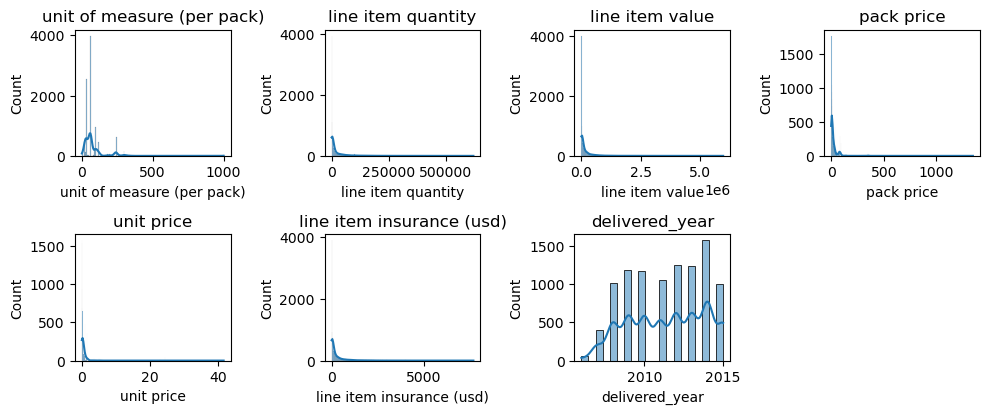

In [25]:
# Numerical columns
plt.figure(figsize=(10,12))
t=1
for i in num_col:
    plt.subplot(6,4,t)
    sns.histplot(df1[i],kde=True)
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

* Many of the variables (except for delivered_year) have heavy right skewness, indicating that a significant portion of the data is concentrated in the lower range with a few high outliers.
* The delivered_year histogram shows temporal trends in data, possibly reflecting operational or reporting patterns over time.

# Bivariate Analysis

In [26]:
cat_col

['country',
 'managed by',
 'fulfill via',
 'vendor inco term',
 'shipment mode',
 'product group',
 'sub classification',
 'brand',
 'dosage',
 'dosage form',
 'manufacturing site',
 'first line designation',
 'weight (kilograms)',
 'freight cost (usd)']

In [27]:
c = ['country',
 'managed by',
 'fulfill via',
 'vendor inco term',
 'product group',
 'sub classification',
 'brand',
 'dosage',
 'dosage form',
 'manufacturing site',
 'first line designation',
 'weight (kilograms)',
 'freight cost (usd)']

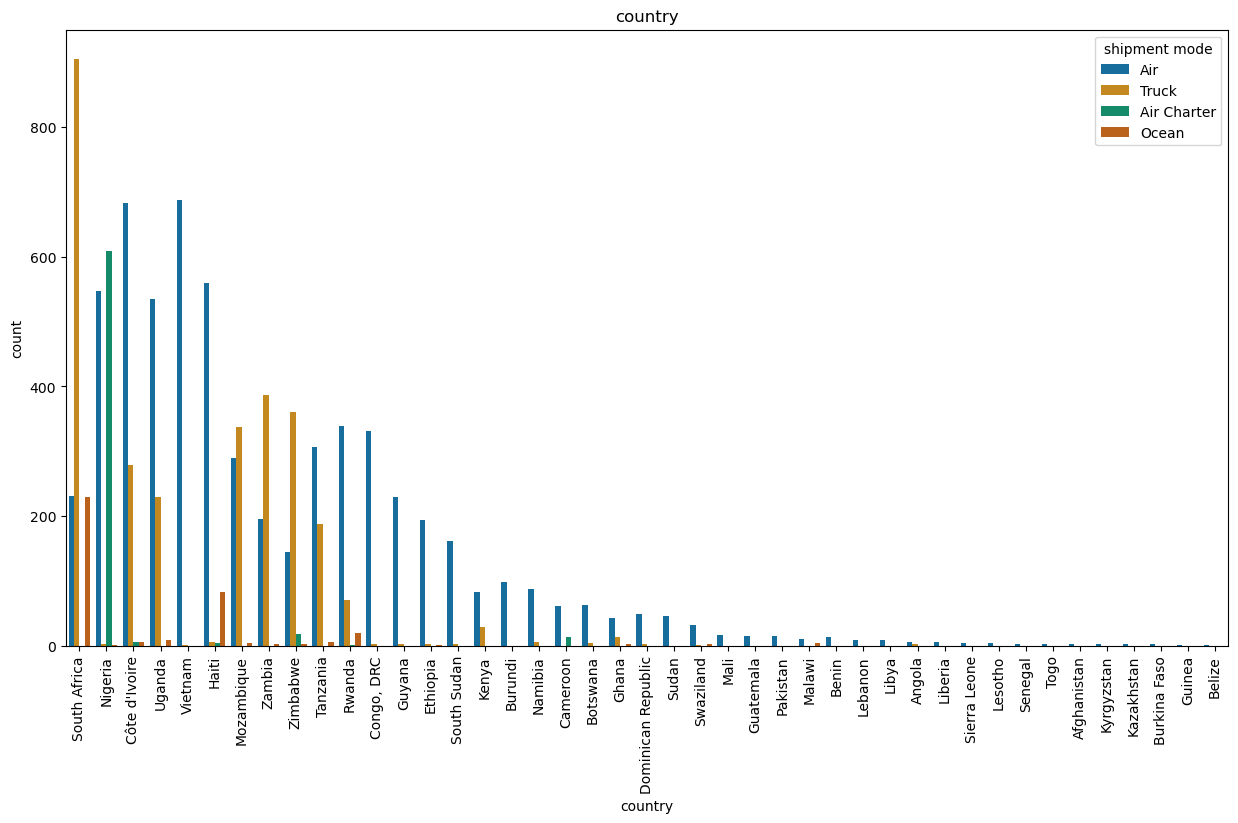

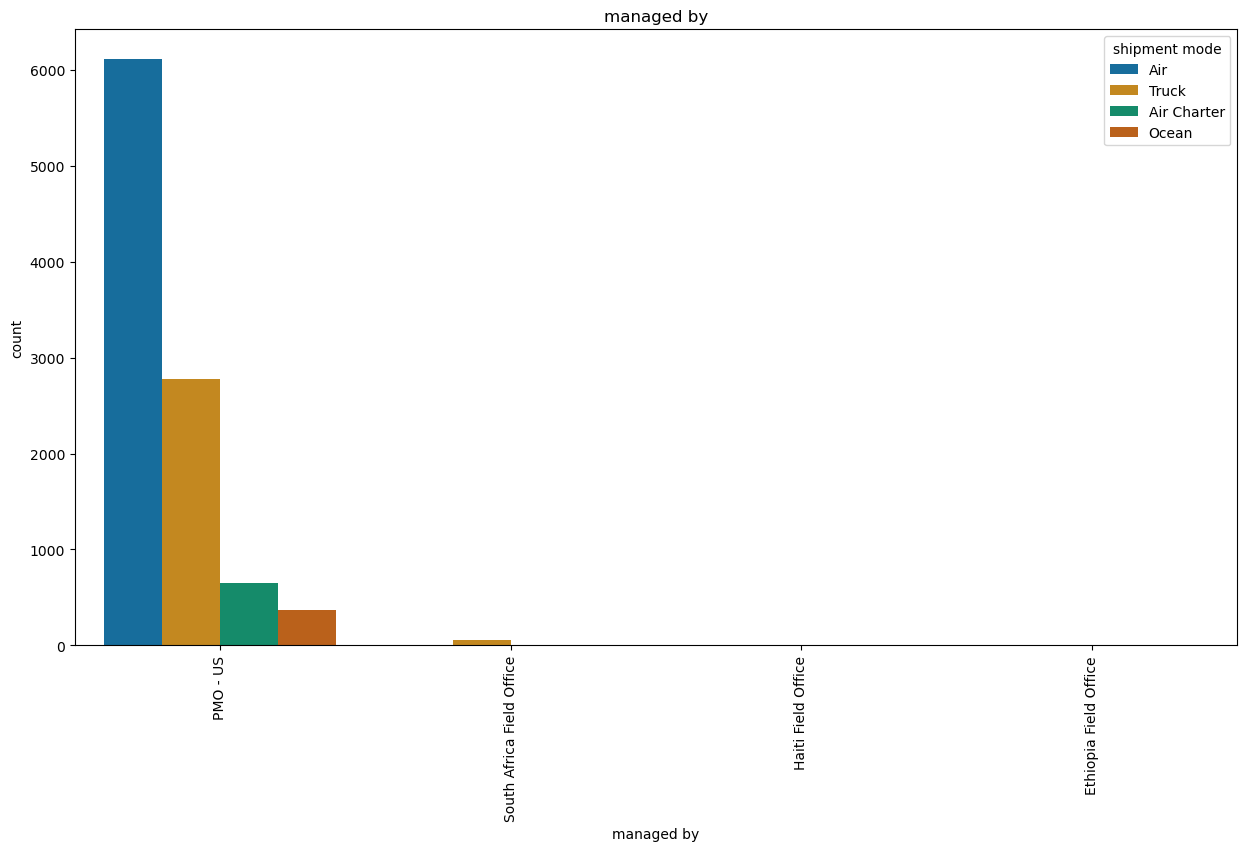

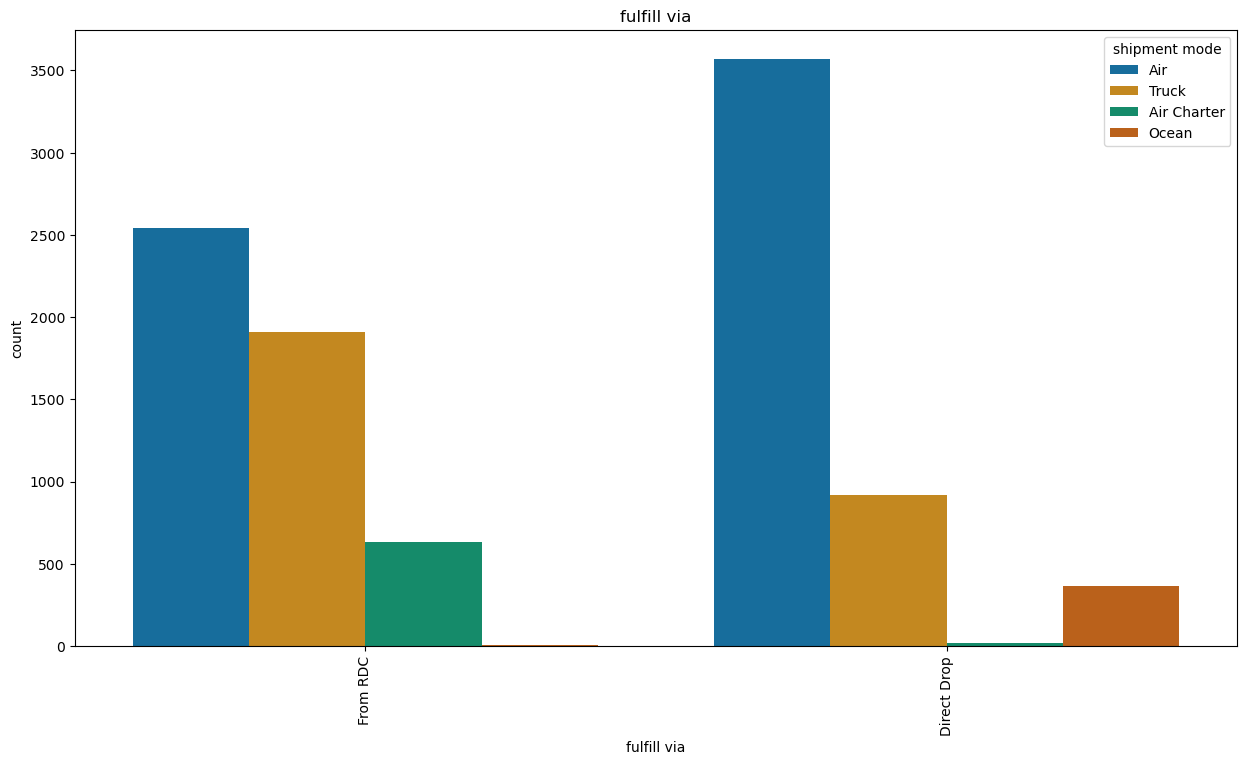

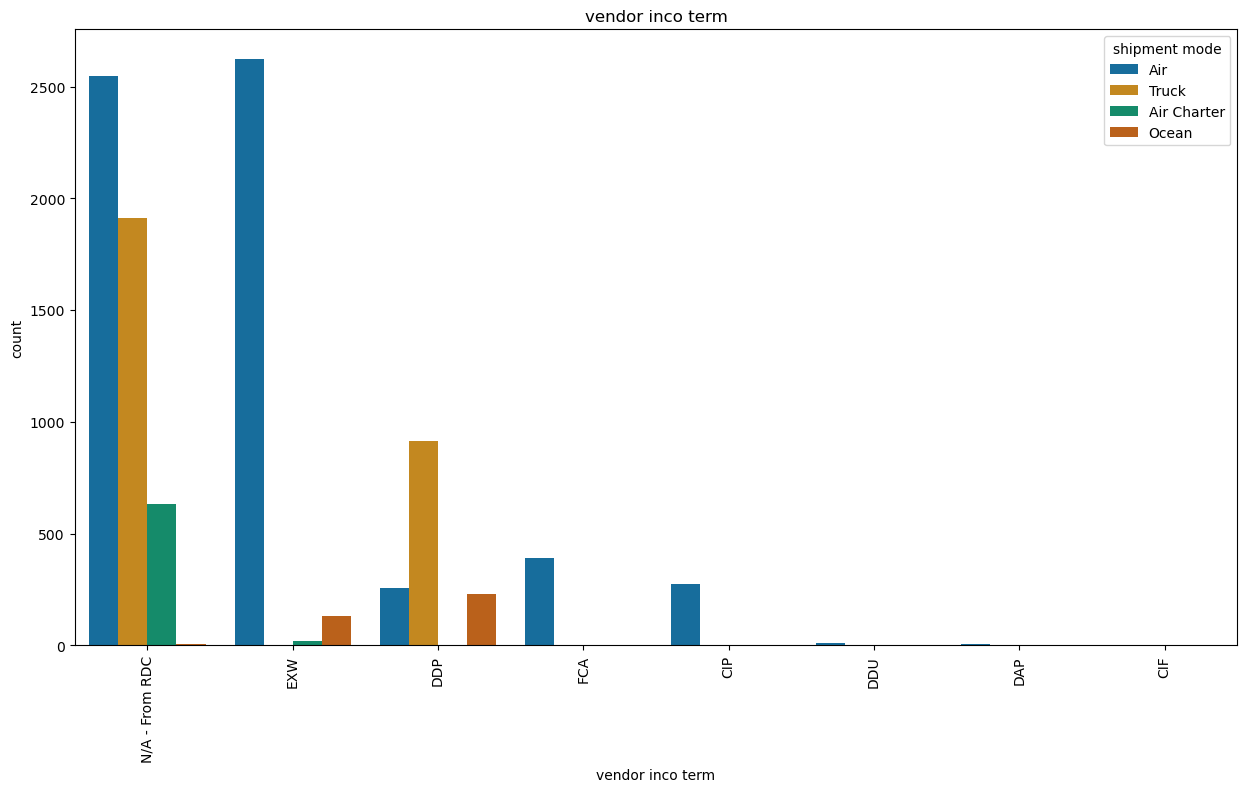

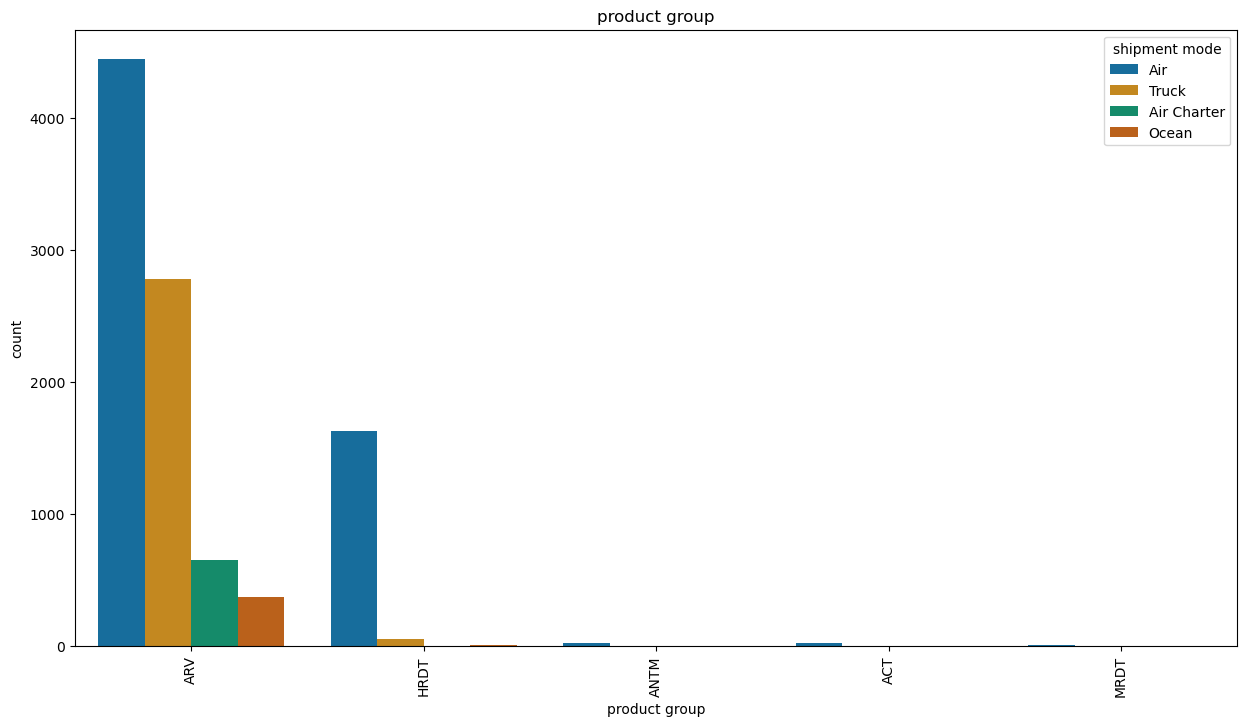

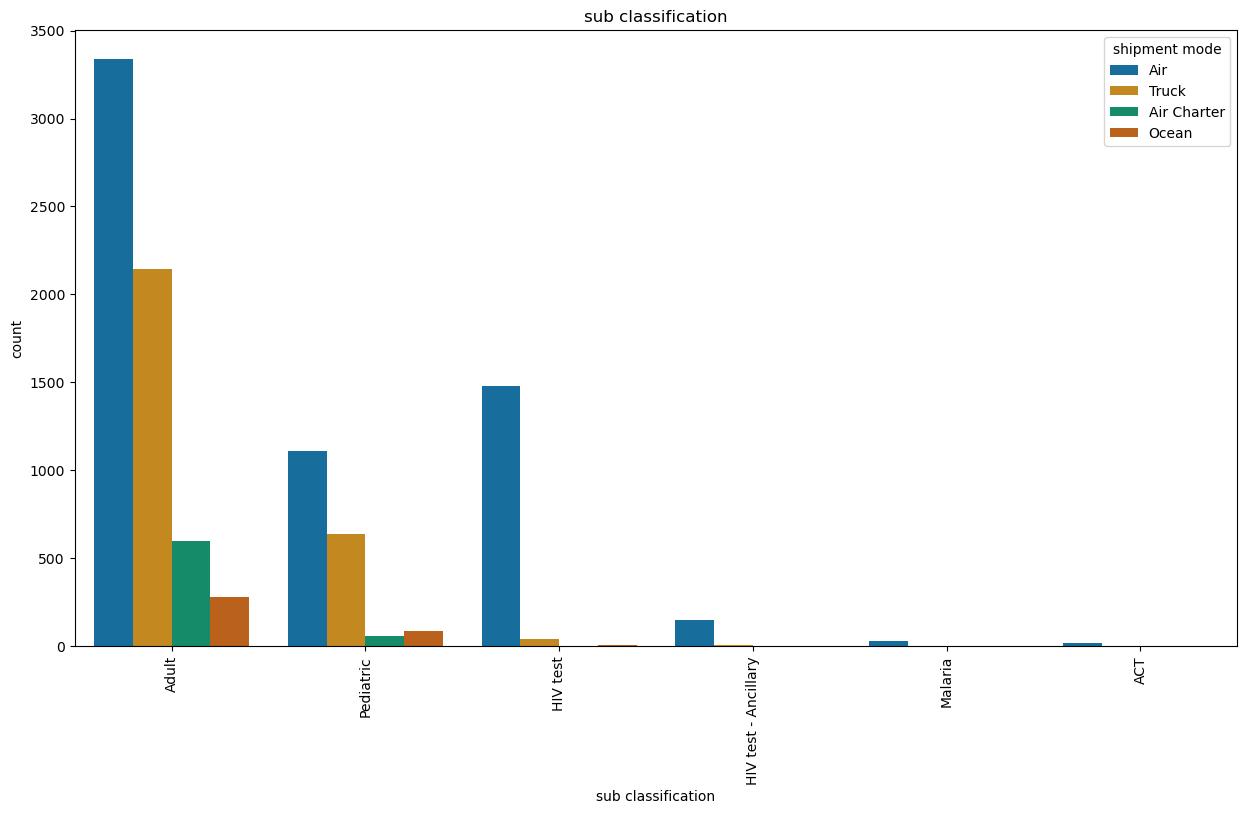

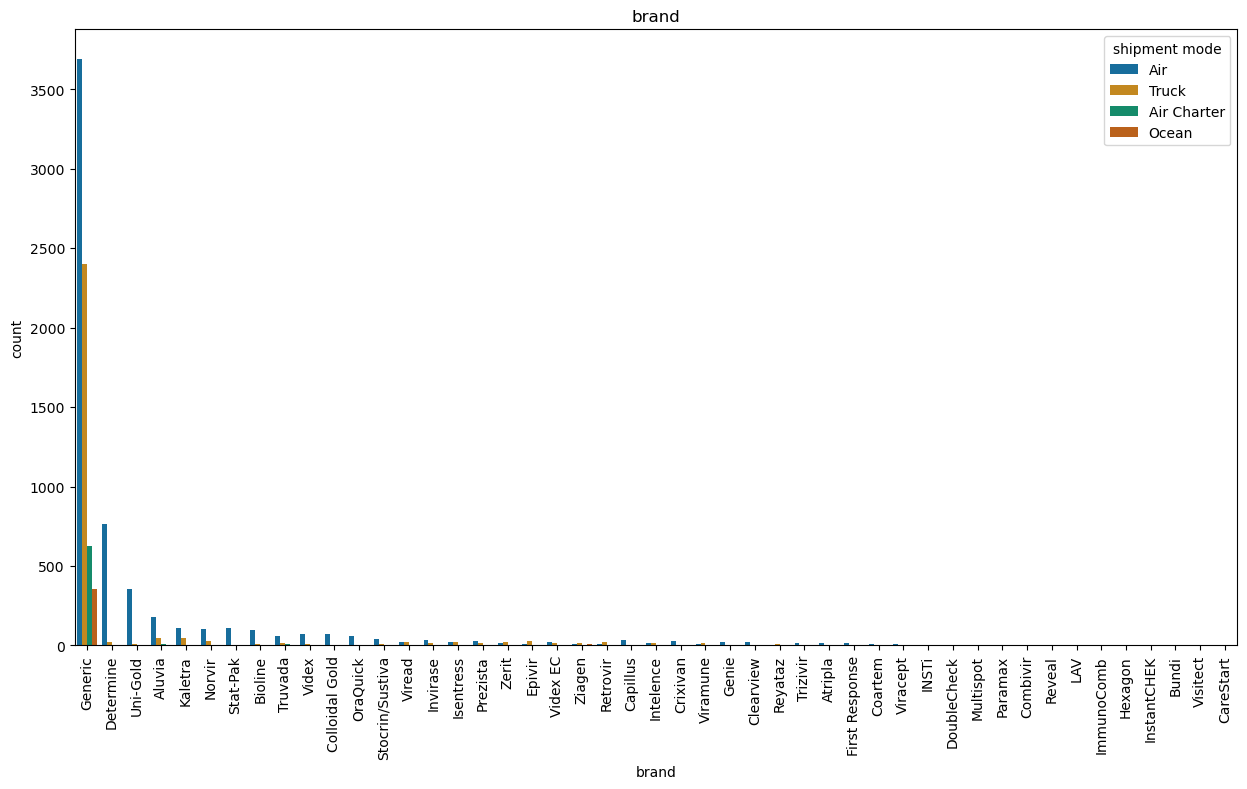

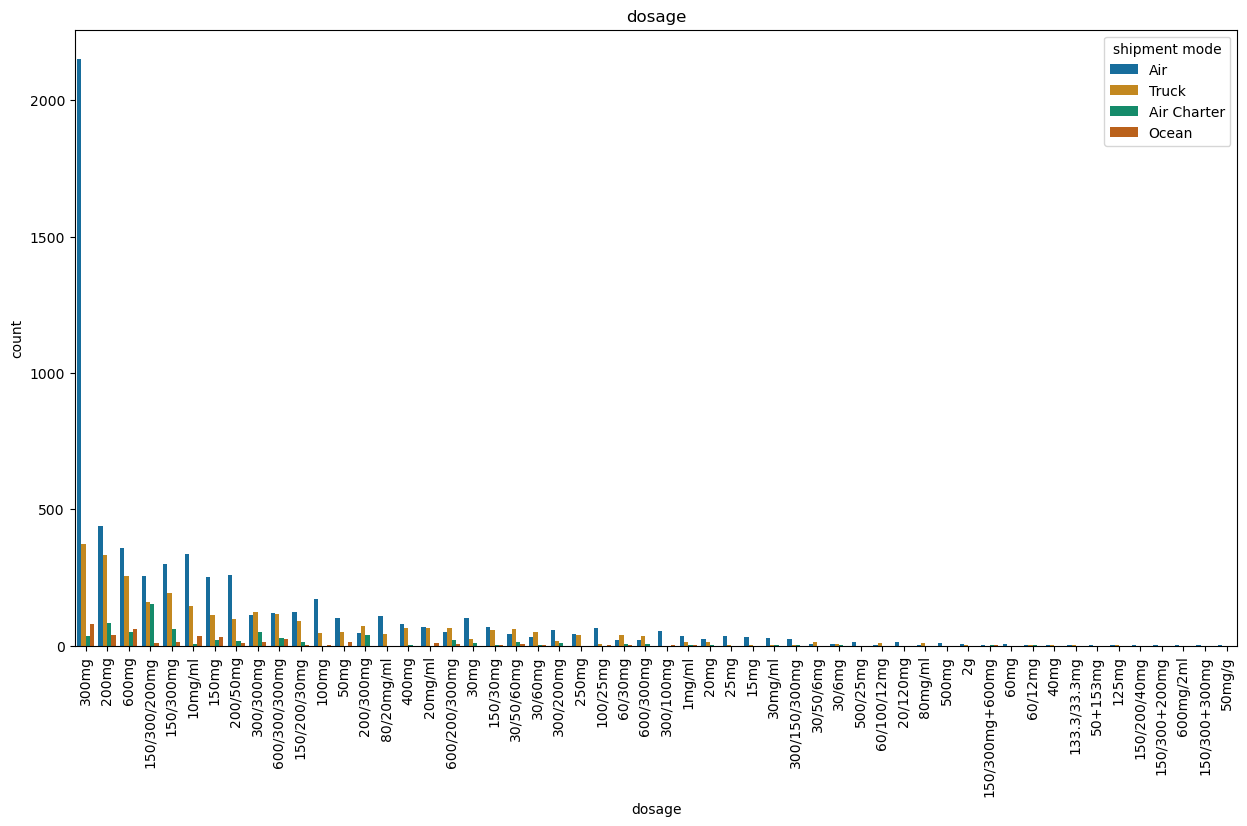

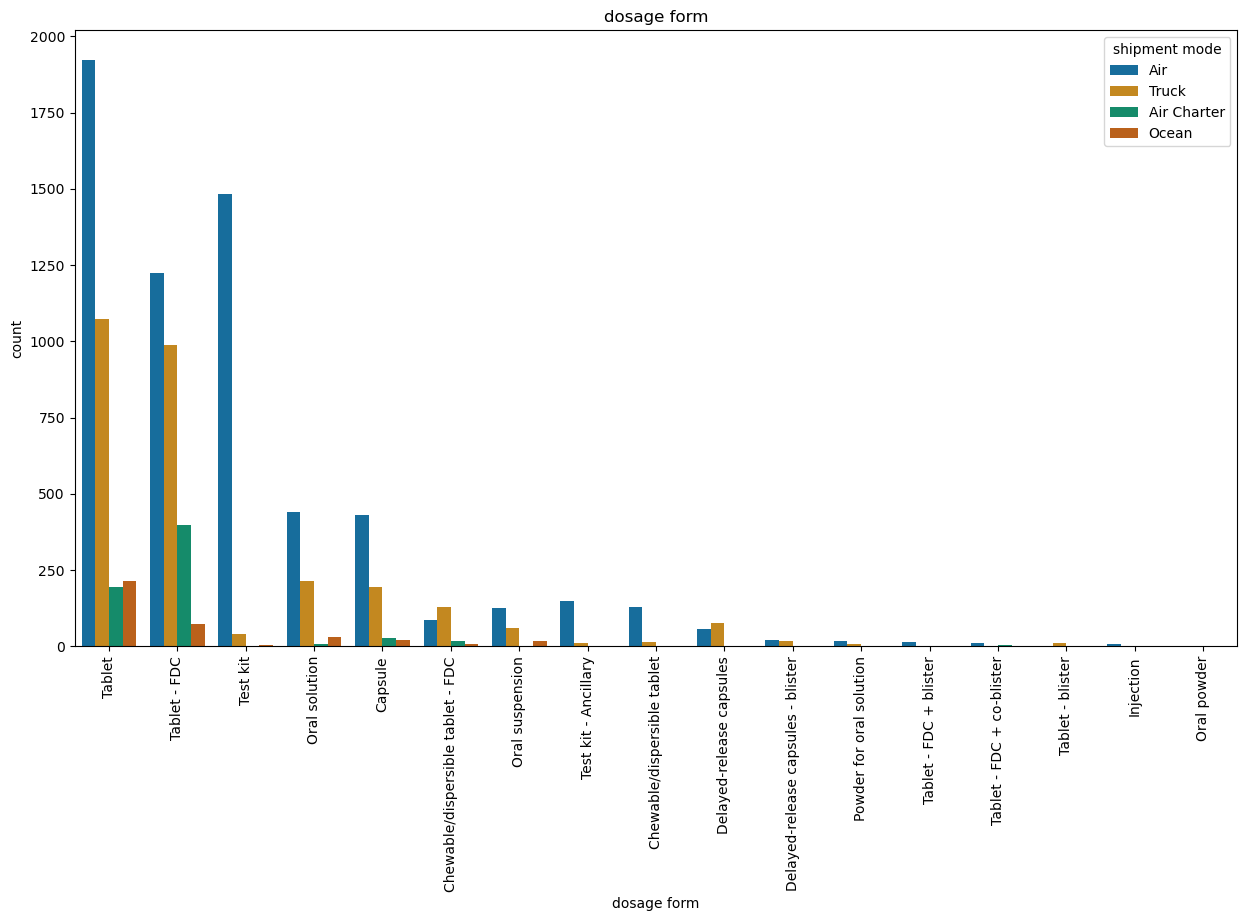

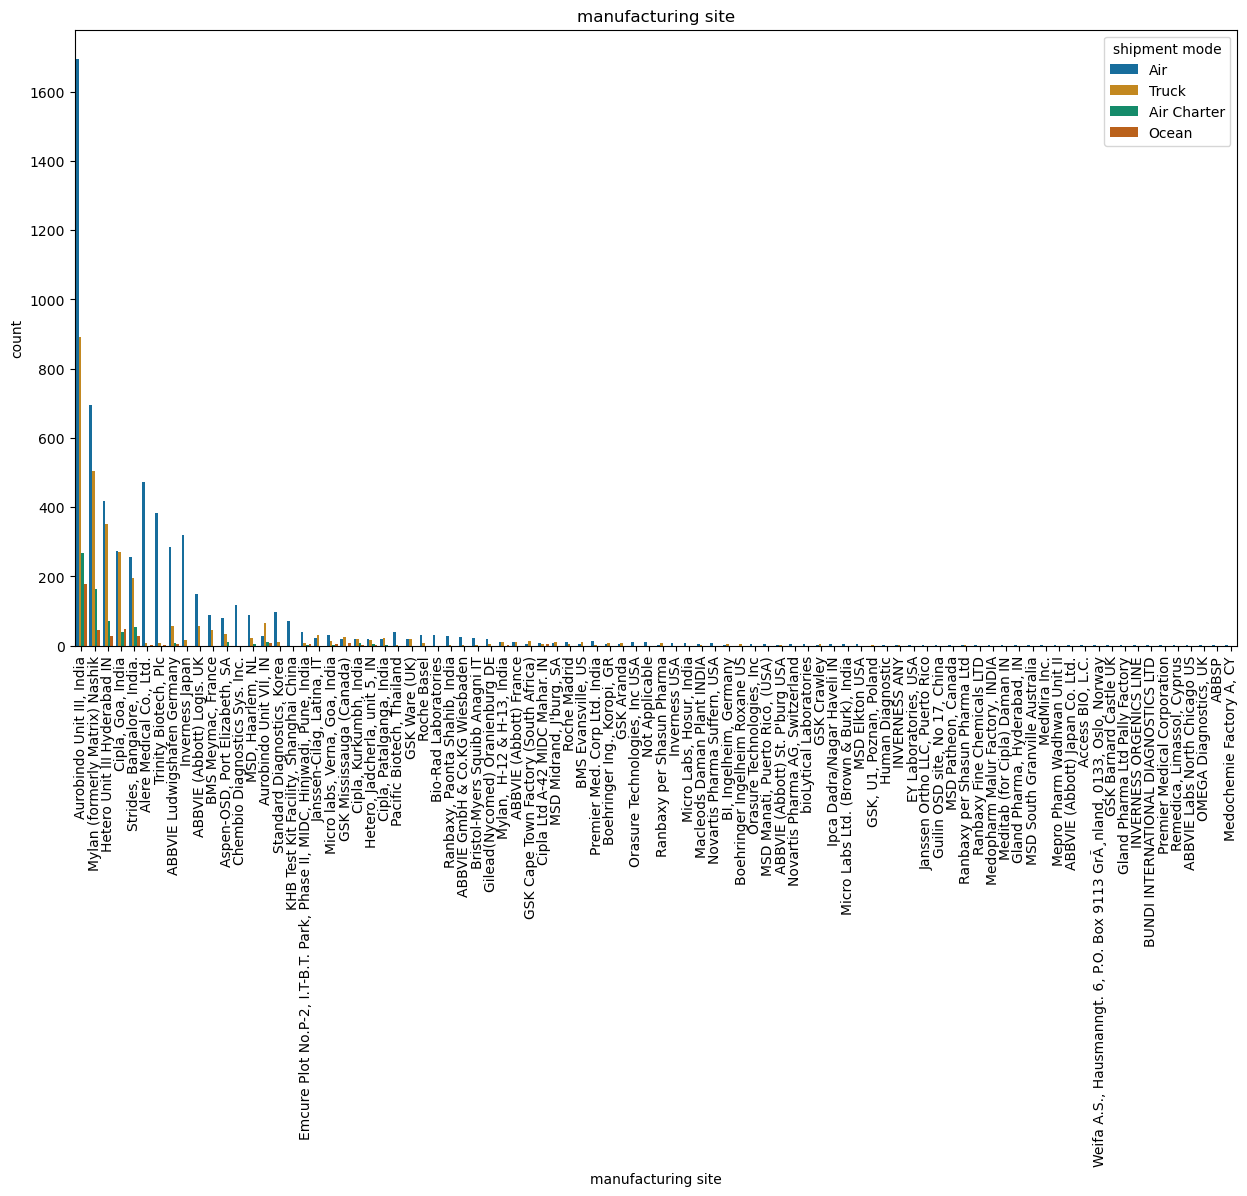

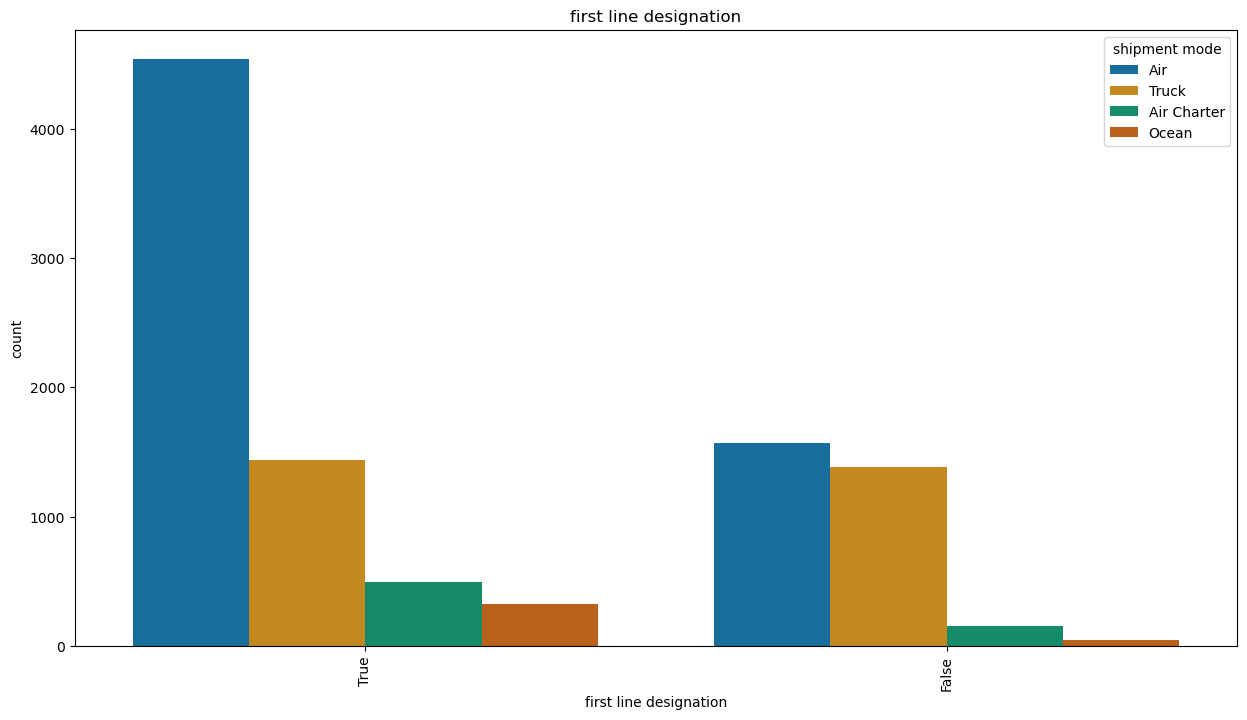

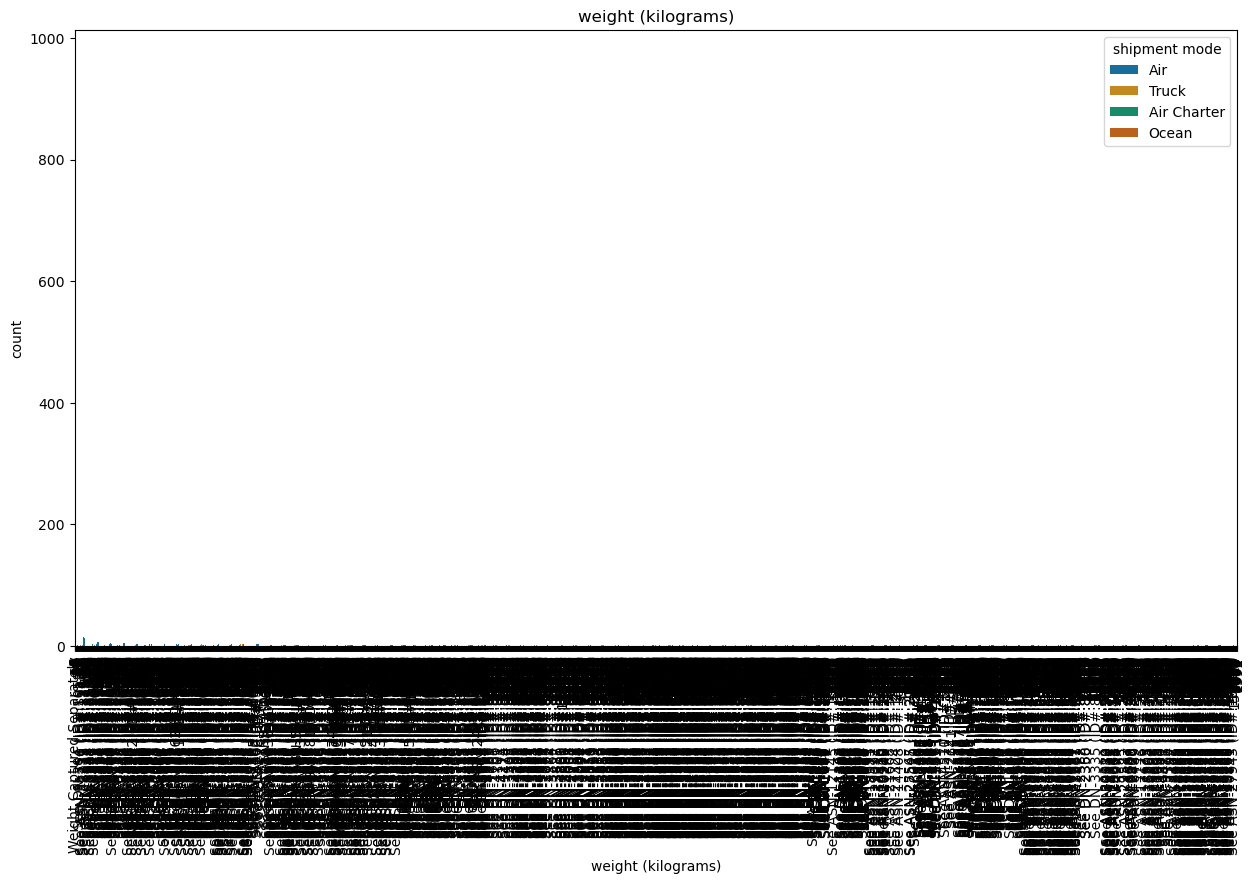

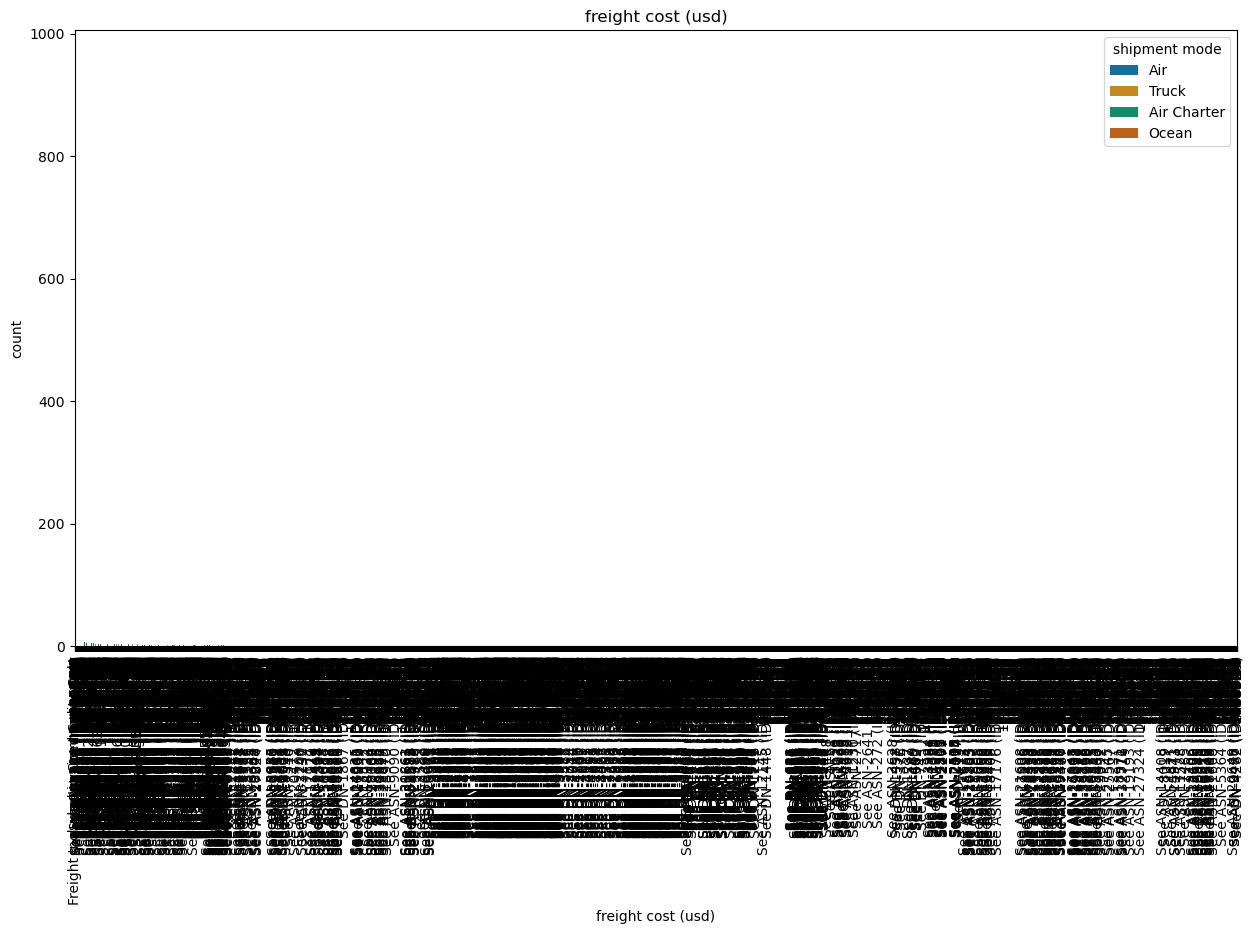

In [28]:
# Categorical columns
#t=1
for i in c:
    #plt.subplot(6,4,t)
    sns.countplot(data=df1,x=i,order=df1[i].value_counts().index,palette='colorblind', hue = "shipment mode")
    plt.title(i)
    plt.xticks(rotation=90)
    #t+=1
#plt.tight_layout()
    plt.show()

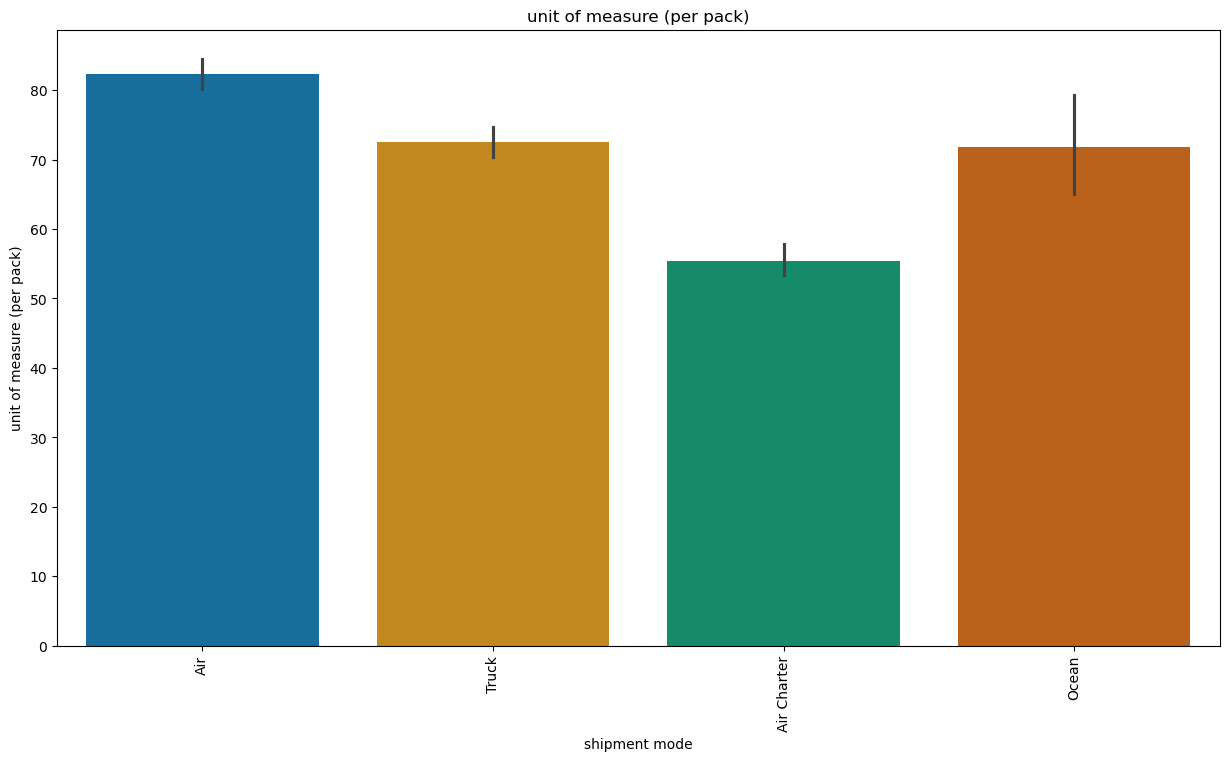

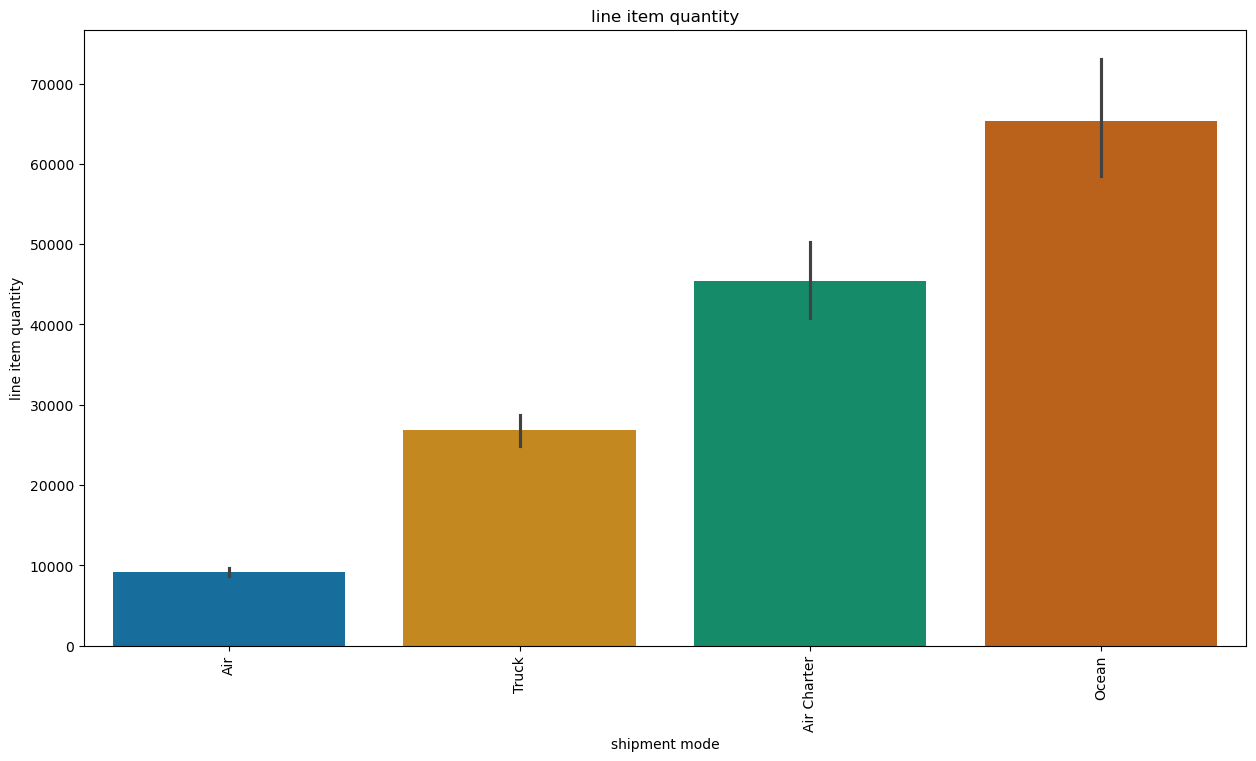

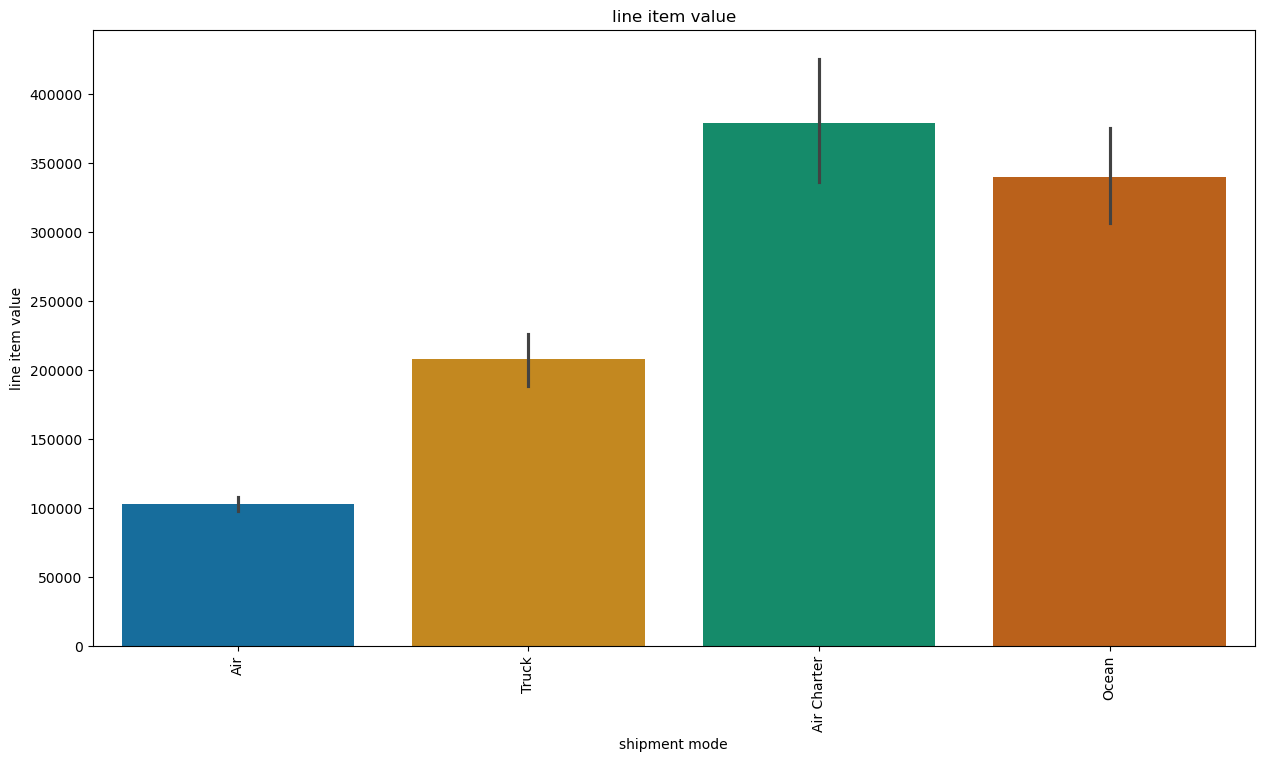

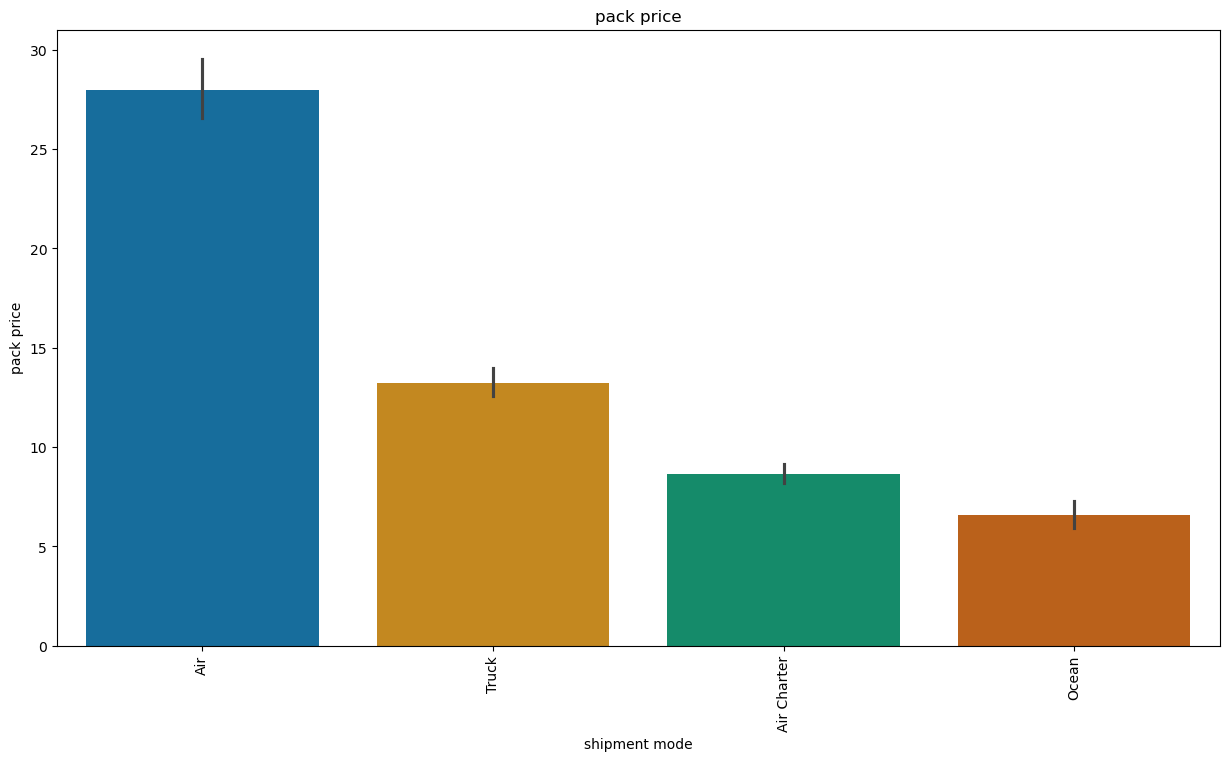

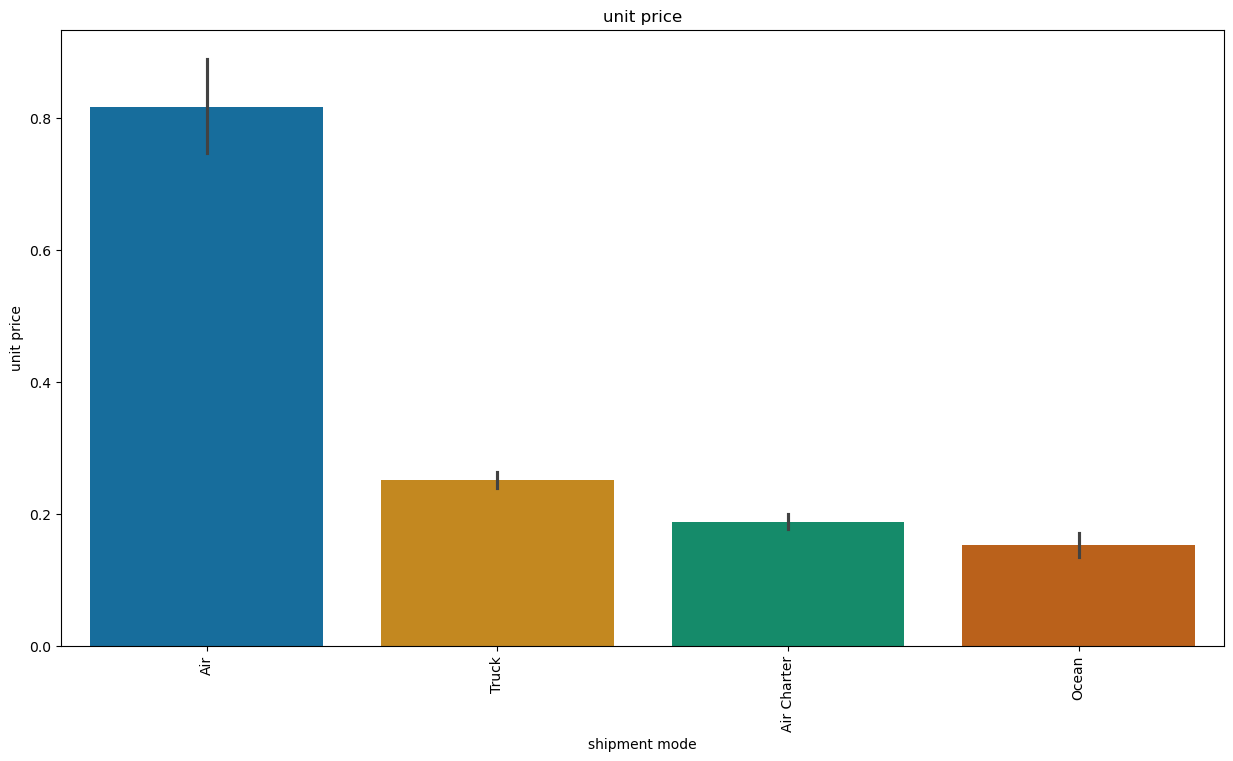

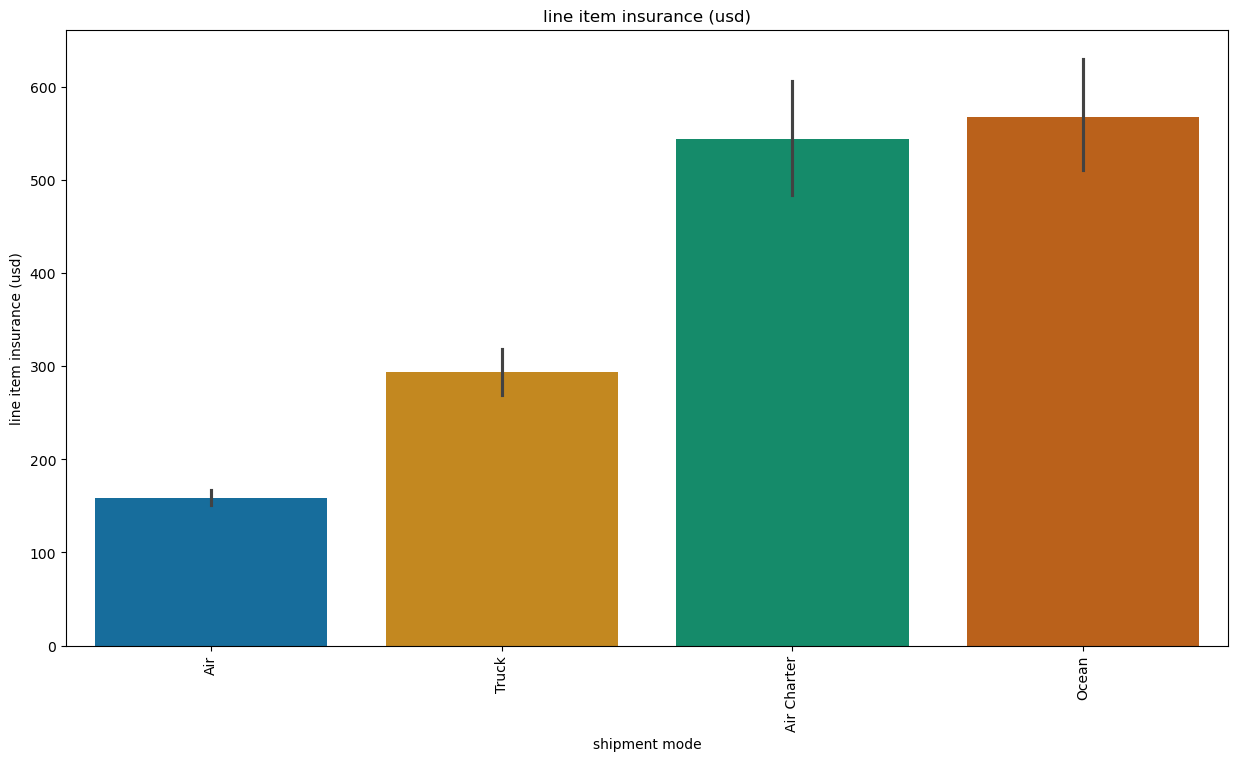

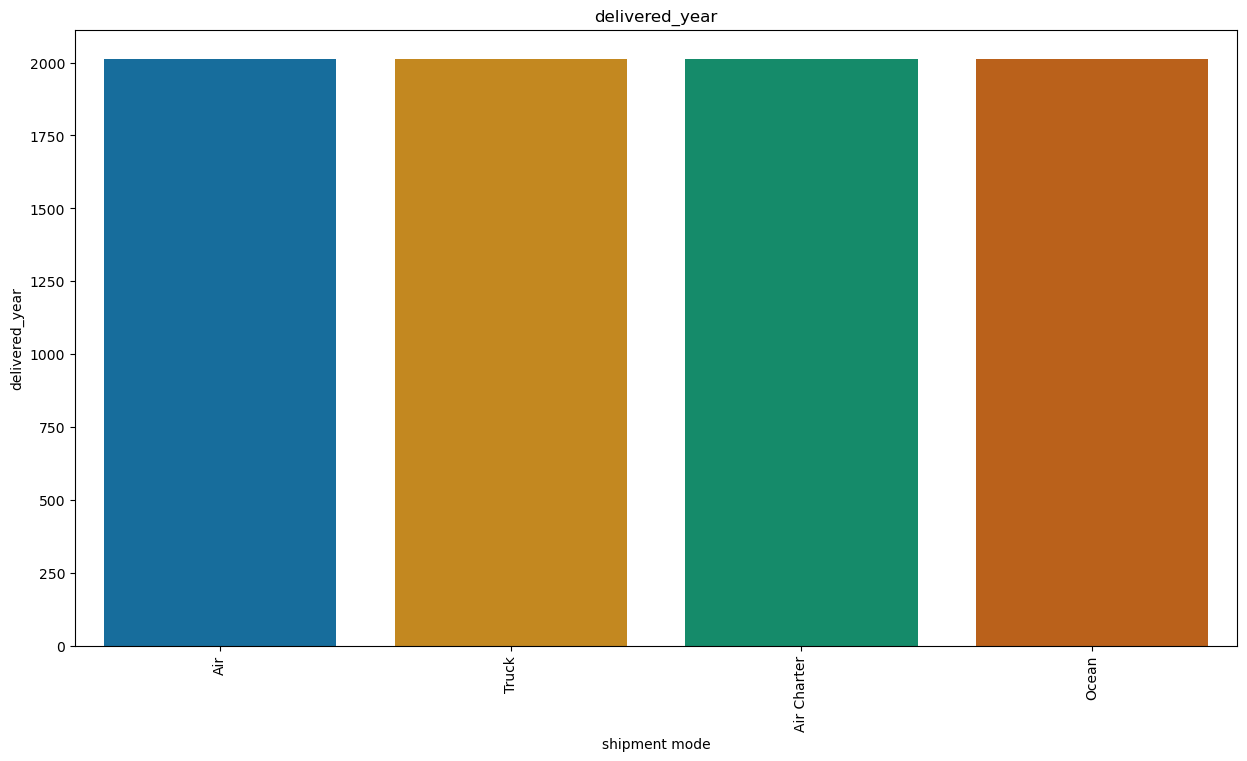

In [29]:
# Numerical variables
for i in num_col:
    #plt.subplot(6,4,t)
    sns.barplot(y=df1[i],x=df1['shipment mode'],palette='colorblind')
    plt.xticks(rotation = 90)
    plt.title(i)
    #t+=1
#plt.tight_layout()
    plt.show()

* The unit price and value of the price is larger in Air than the Ocean.
* Quantity is larger because the container can store quantiy in tonnes
* The ocean shipment takes more days to deliver compare to air so the insurance of the item is more than others.

### Multivariate Analysis

In [30]:
c = df1[num_col].corr()
c

,unit of measure (per pack),line item quantity,line item value,pack price,unit price,line item insurance (usd),delivered_year
unit of measure (per pack),1.000000,-0.149098,-0.125568,0.096485,-0.136810,-0.128747,-0.054040
line item quantity,-0.149098,1.000000,0.840036,-0.132249,-0.070575,0.798770,0.109251
line item value,-0.125568,0.840036,1.000000,-0.016801,-0.023601,0.958900,0.092650
pack price,0.096485,-0.132249,-0.016801,1.000000,0.310204,-0.018277,-0.049853
unit price,-0.136810,-0.070575,-0.023601,0.310204,1.000000,-0.026139,0.011427
line item insurance (usd),-0.128747,0.798770,0.958900,-0.018277,-0.026139,1.000000,0.016924
delivered_year,-0.054040,0.109251,0.092650,-0.049853,0.011427,0.016924,1.000000


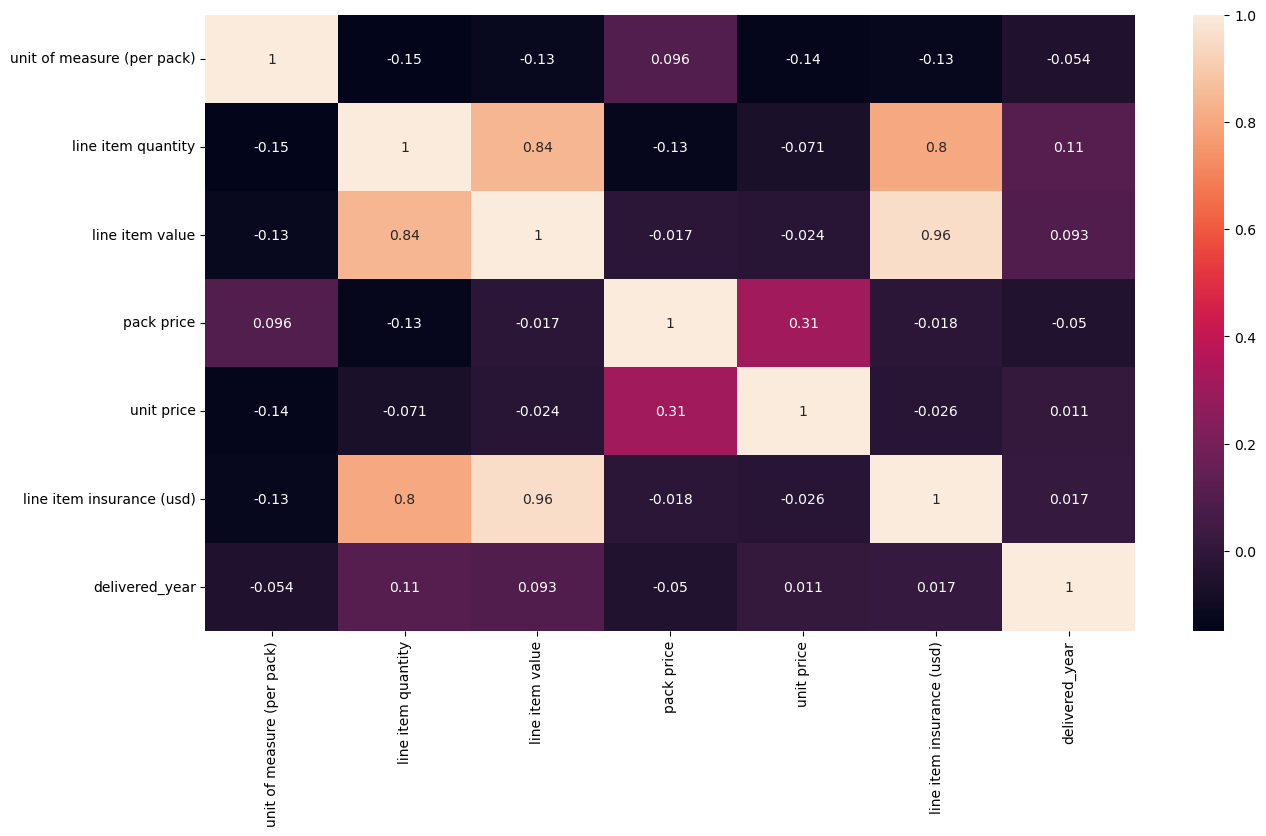

In [31]:
sns.heatmap(c,annot = True)
plt.show()

* In tha above heatmap we can see the column line item quantity and line item value has 0.84. This indicated they are highly correlated
* The line item value and line item insurance(usd) has 0.96. This also indicated they are highly correlated
* Also line item quantity and line item insurance(usd) has 0.8. This also indicated they are highly correlated

## Check for outliers

In [32]:
df1[num_col].skew()

unit of measure (per pack)     4.429445
line item quantity             4.991901
line item value                5.810507
pack price                    13.214320
unit price                     9.874125
line item insurance (usd)      4.872717
delivered_year                -0.165284
dtype: float64

In [33]:
df1[num_col].kurt()

unit of measure (per pack)     37.811871
line item quantity             39.143877
line item value                53.368868
pack price                    300.195941
unit price                    104.781505
line item insurance (usd)      35.403133
delivered_year                 -1.123970
dtype: float64

* line item value,pack price and unit price are very much skewed which is greater than 5

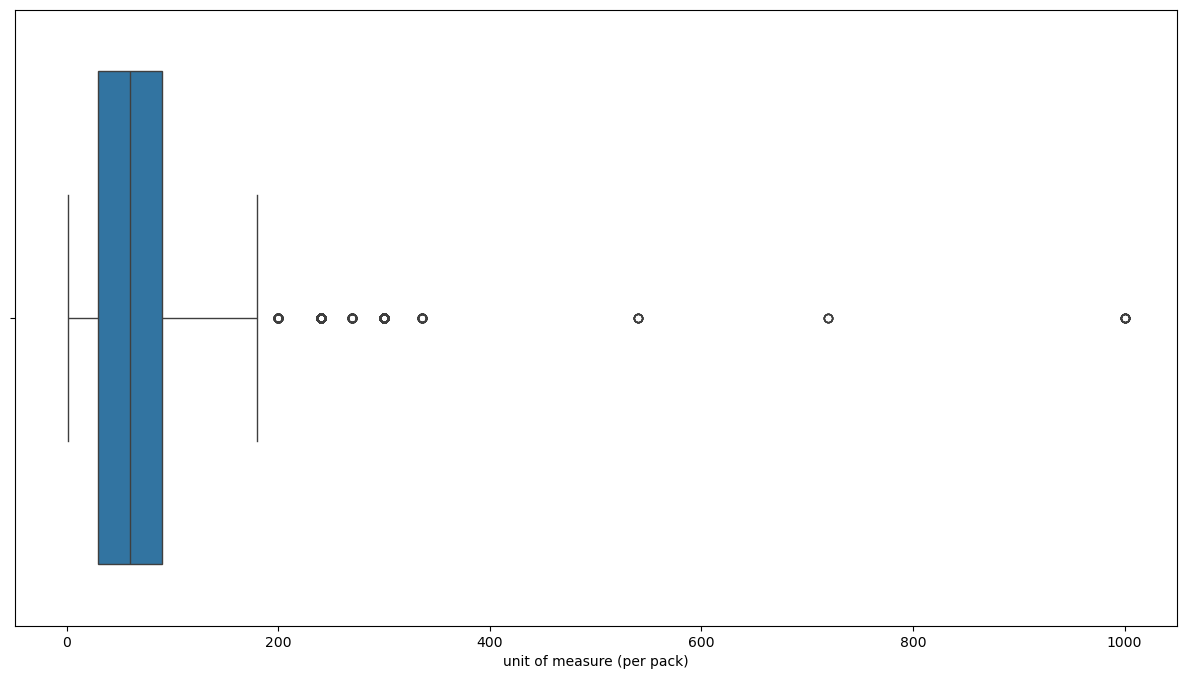

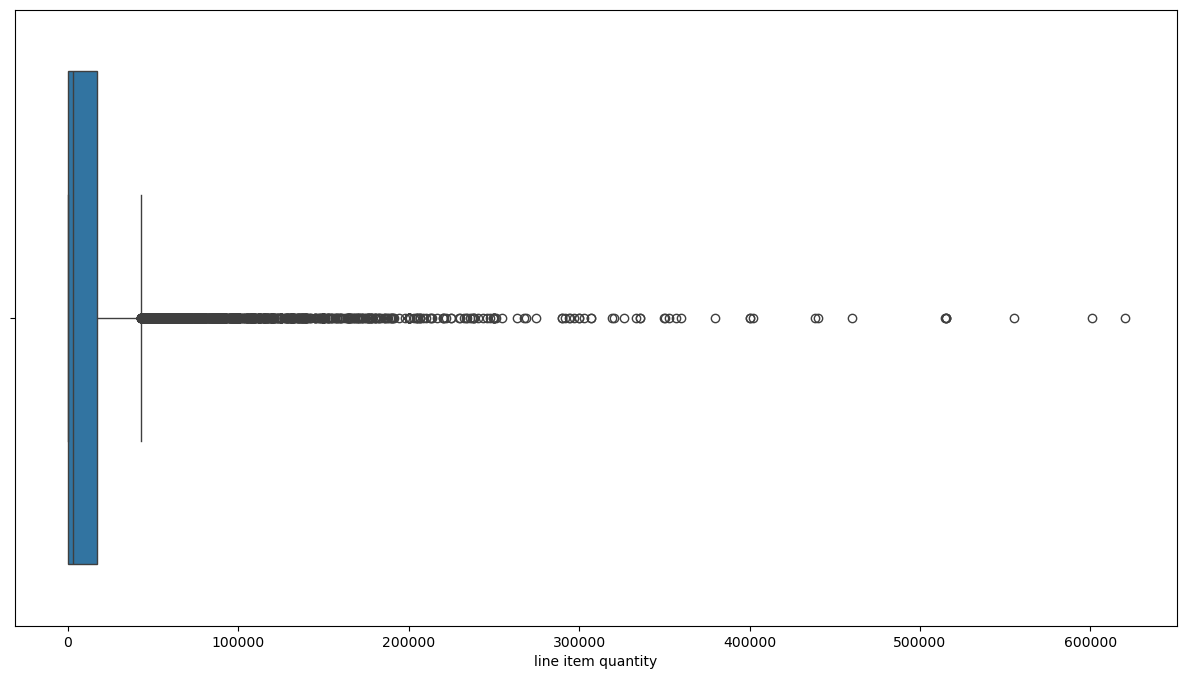

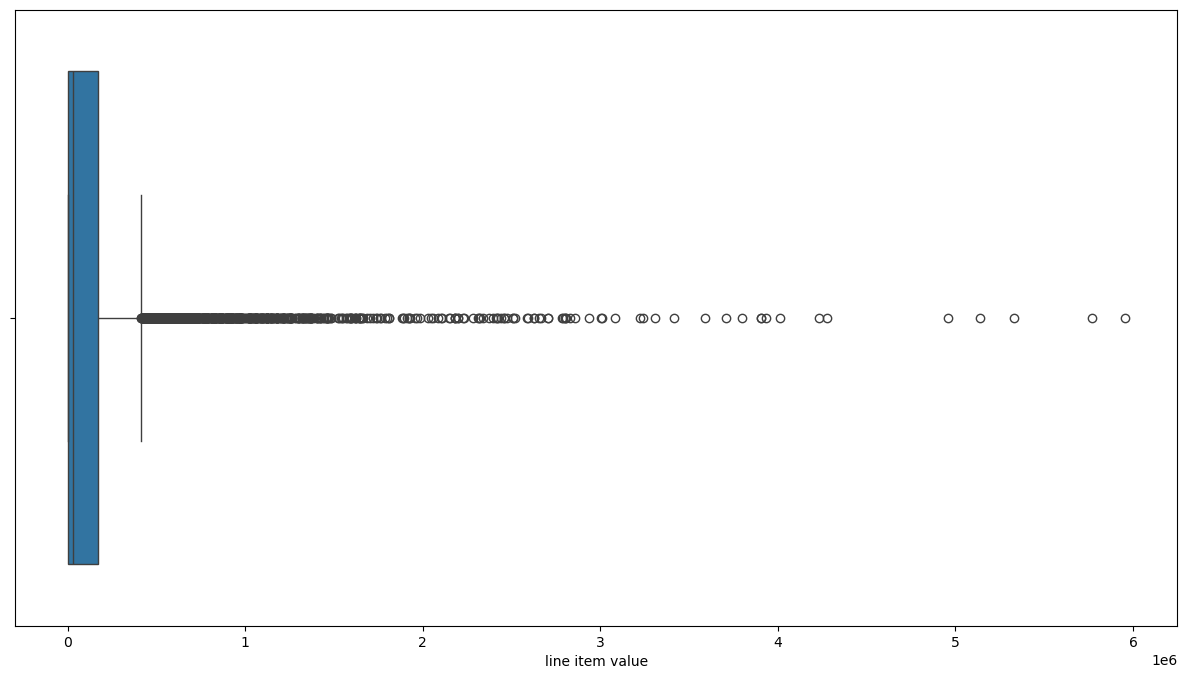

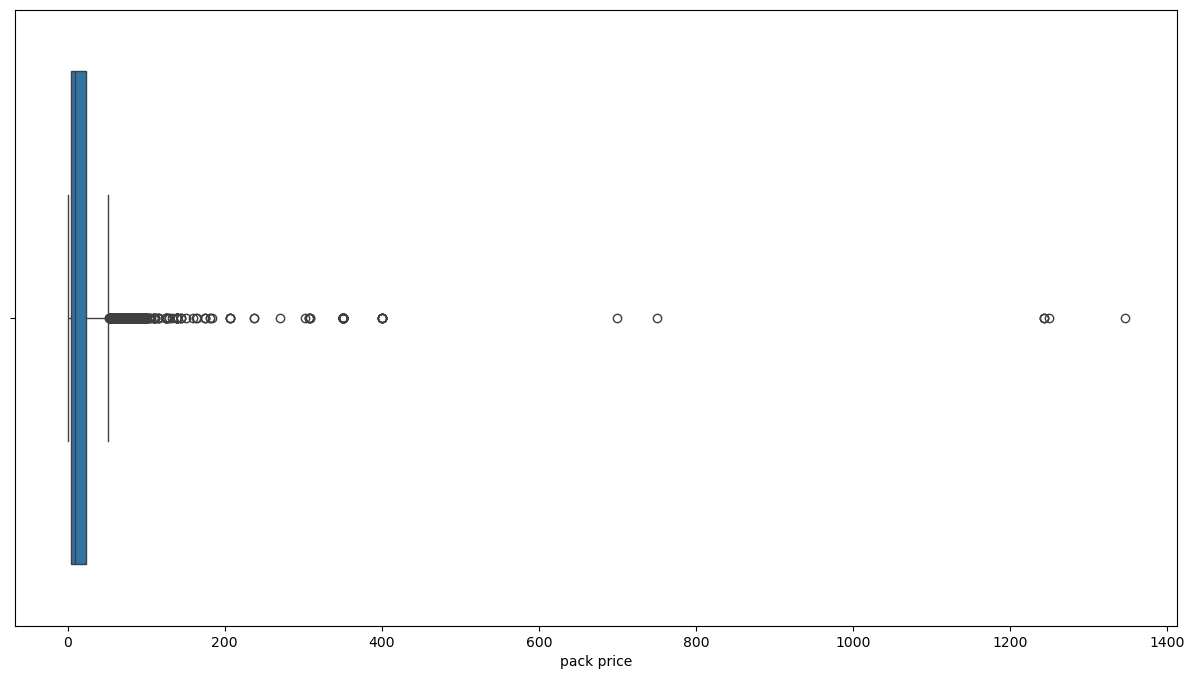

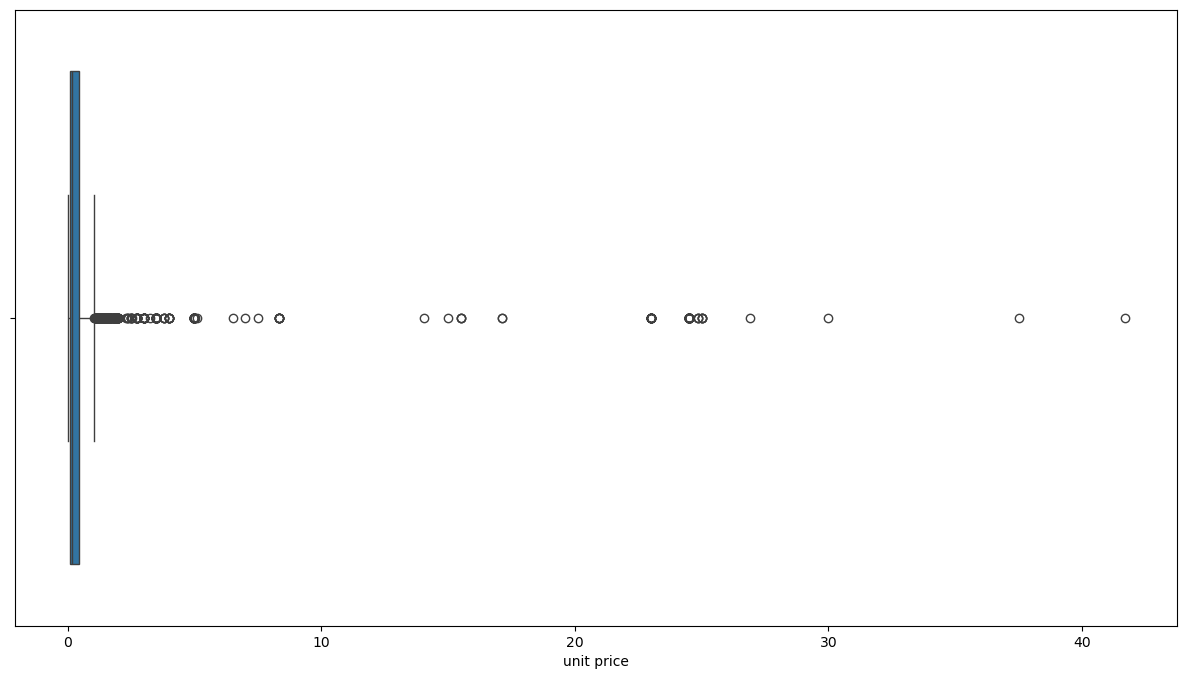

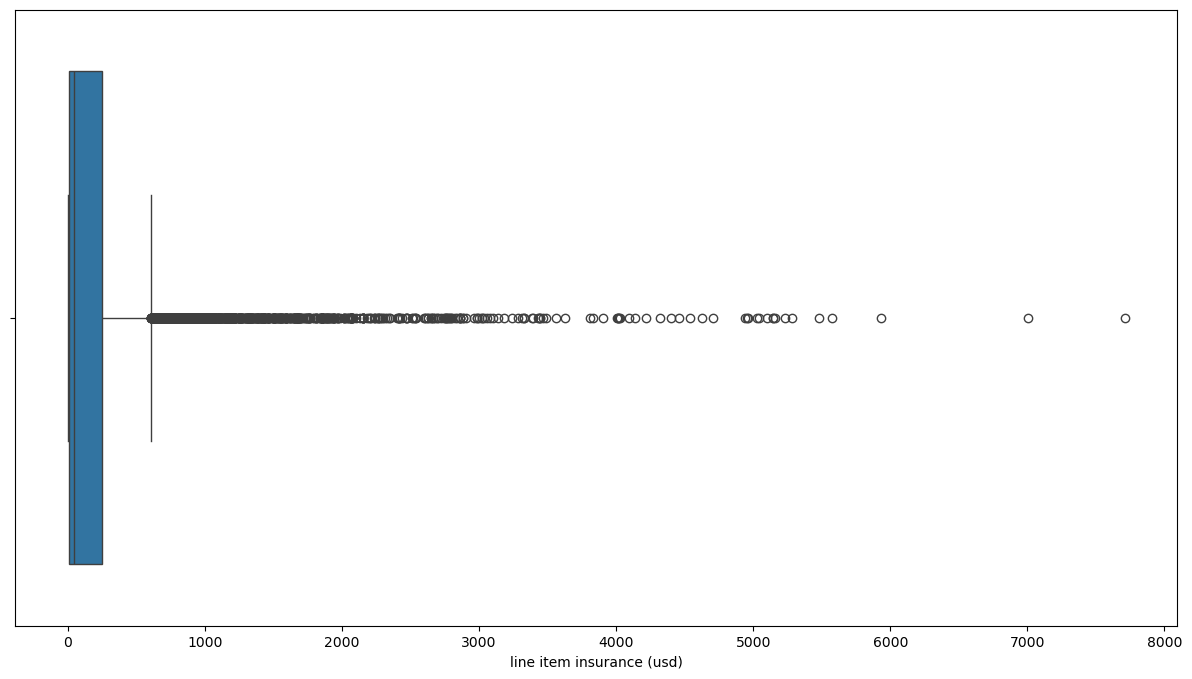

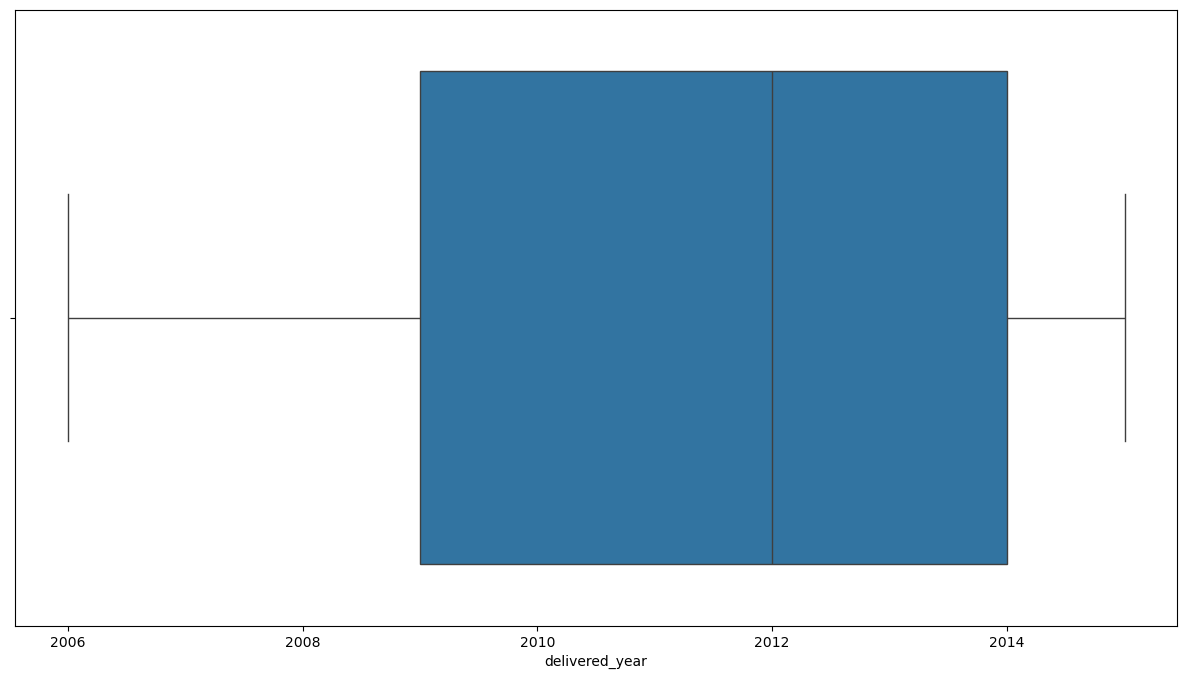

In [34]:
#numeric - boxplot
for i in num_col:
    sns.boxplot(x = df1[i])
    plt.show()

In [35]:
#using IQR method

q3 = df1[num_col].quantile(0.75)
q1 = df1[num_col].quantile(0.25)

In [36]:
iqr = q3-q1
iqr

unit of measure (per pack)        60.0000
line item quantity             17036.7500
line item value               164395.3175
pack price                        19.1400
unit price                         0.3800
line item insurance (usd)        241.2775
delivered_year                     5.0000
dtype: float64

In [37]:
uw = q3 + 1.5*iqr
uw

unit of measure (per pack)       180.00000
line item quantity             42996.87500
line item value               415260.32625
pack price                        51.97000
unit price                         1.03000
line item insurance (usd)        609.98125
delivered_year                  2021.50000
dtype: float64

In [38]:
lw = q1 - 1.5*iqr
lw

unit of measure (per pack)       -60.00000
line item quantity            -25150.12500
line item value              -242320.94375
pack price                       -24.59000
unit price                        -0.49000
line item insurance (usd)       -355.12875
delivered_year                  2001.50000
dtype: float64

* This filtered_data has the data without the outliers
* But there is need of these outliers because there are some datas lies in the outliers which can be useful to analyse the given data set
* So i am proceeding with the data set without removing the outliers 
* If neccessary we can remove it under some of the specific conditions

In [39]:
# Checking for negative values
negative_cols = [col for col in num_col if df1[col].any() < 0]

print("Columns with negative values:", negative_cols)

Columns with negative values: []


# Encoding

In [40]:
df1[cat_col].head()

,country,managed by,fulfill via,vendor inco term,shipment mode,product group,sub classification,brand,dosage,dosage form,manufacturing site,first line designation,weight (kilograms),freight cost (usd)
0,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,HRDT,HIV test,Reveal,300mg,Test kit,Ranbaxy Fine Chemicals LTD,True,13,780.34
1,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Pediatric,Generic,10mg/ml,Oral suspension,"Aurobindo Unit III, India",True,358,4521.5
2,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,HRDT,HIV test,Determine,300mg,Test kit,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78
3,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Adult,Generic,150mg,Tablet,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06
4,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Adult,Generic,30mg,Capsule,"Aurobindo Unit III, India",True,7590,45450.08


In [41]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()
df_encoded = {}

for cat in cat_col:
    df_encoded[cat] = lab_enc.fit_transform(df1[cat])

In [42]:
df_encoded = pd.DataFrame(df_encoded)

In [43]:
df_encoded.head()

,country,managed by,fulfill via,vendor inco term,shipment mode,product group,sub classification,brand,dosage,dosage form,manufacturing site,first line designation,weight (kilograms),freight cost (usd)
0,9,2,0,5,0,3,2,32,33,15,76,1,400,4644
1,40,2,0,5,0,2,5,15,2,8,11,1,1826,3506
2,9,2,0,6,0,3,2,11,33,15,5,1,761,1217
3,40,2,0,5,0,2,1,15,13,10,79,1,881,1138
4,40,2,0,5,0,2,1,15,34,0,11,1,2937,3520


# Scaling

In [44]:
# Standard Scalar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df1_sc = scalar.fit_transform(df1[num_col])
df1_sc

array([[-0.62083567, -0.45830815, -0.45443235, ...,  0.16563166,
        -0.38167743, -2.23545125],
       [ 2.12820971, -0.43412819, -0.43826113, ..., -0.24438764,
        -0.38167743, -2.23545125],
       [ 0.29551279, -0.44645233, -0.34150294, ...,  0.09147923,
        -0.38167743, -2.23545125],
       ...,
       [-0.62083567, 12.22340059, 14.2584352 , ..., -0.11353042,
        10.10125532,  1.49651551],
       [-0.2281149 , -0.02829438, -0.13003246, ..., -0.20949238,
        -0.20754905,  1.49651551],
       [-0.2281149 ,  0.44431159, -0.24728791, ..., -0.24438764,
        -0.30405128,  1.49651551]])

In [45]:
df_scaled = pd.DataFrame(data = df1_sc, columns = num_col)

In [46]:
df_scaled.head()

,unit of measure (per pack),line item quantity,line item value,pack price,unit price,line item insurance (usd),delivered_year
0,-0.620836,-0.458308,-0.454432,0.158961,0.165632,-0.381677,-2.235451
1,2.128210,-0.434128,-0.438261,-0.339861,-0.244388,-0.381677,-2.235451
2,0.295513,-0.446452,-0.341503,1.274746,0.091479,-0.381677,-2.235451
3,-0.228115,0.327996,-0.091418,-0.388212,-0.226940,-0.381677,-2.235451
4,-0.228115,0.477858,-0.107909,-0.405496,-0.235664,-0.381677,-2.235451


In [47]:
df_combined = pd.concat([df_scaled, df_encoded], axis=1)
df_combined.head()

,unit of measure (per pack),line item quantity,line item value,pack price,unit price,line item insurance (usd),delivered_year,country,managed by,fulfill via,vendor inco term,shipment mode,product group,sub classification,brand,dosage,dosage form,manufacturing site,first line designation,weight (kilograms),freight cost (usd)
0,-0.620836,-0.458308,-0.454432,0.158961,0.165632,-0.381677,-2.235451,9,2,0,5,0,3,2,32,33,15,76,1,400,4644
1,2.128210,-0.434128,-0.438261,-0.339861,-0.244388,-0.381677,-2.235451,40,2,0,5,0,2,5,15,2,8,11,1,1826,3506
2,0.295513,-0.446452,-0.341503,1.274746,0.091479,-0.381677,-2.235451,9,2,0,6,0,3,2,11,33,15,5,1,761,1217
3,-0.228115,0.327996,-0.091418,-0.388212,-0.226940,-0.381677,-2.235451,40,2,0,5,0,2,1,15,13,10,79,1,881,1138
4,-0.228115,0.477858,-0.107909,-0.405496,-0.235664,-0.381677,-2.235451,40,2,0,5,0,2,1,15,34,0,11,1,2937,3520


In [48]:
df_combined.shape
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9964 entries, 0 to 9963
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   unit of measure (per pack)  9964 non-null   float64
 1   line item quantity          9964 non-null   float64
 2   line item value             9964 non-null   float64
 3   pack price                  9964 non-null   float64
 4   unit price                  9964 non-null   float64
 5   line item insurance (usd)   9964 non-null   float64
 6   delivered_year              9964 non-null   float64
 7   country                     9964 non-null   int32  
 8   managed by                  9964 non-null   int32  
 9   fulfill via                 9964 non-null   int32  
 10  vendor inco term            9964 non-null   int32  
 11  shipment mode               9964 non-null   int32  
 12  product group               9964 non-null   int32  
 13  sub classification          9964 

# Train Test Split

In [49]:
x = df_combined.drop('shipment mode',axis = 1)
y = df_combined['shipment mode']

In [50]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size= 0.3,random_state= 5)

In [51]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(6974, 20)
(2990, 20)
(6974,)
(2990,)


# Model Building

In [52]:
# user_define function for metrics

from sklearn.metrics import accuracy_score,precision_score,f1_score
from sklearn.metrics import classification_report,recall_score,roc_auc_score,auc,cohen_kappa_score

def metrics(name,key,arg):
    print('Name of the model: ',name)
    print('Precision score: ',precision_score(key,arg,average= 'weighted'))
    print('Recall_score: ',recall_score(key,arg,average= 'weighted'))
    print('Accuracy score: ',accuracy_score(key,arg))
    print('Weighted F1 score: ',f1_score(key,arg,average= 'weighted'))
    print('Classification report: ',classification_report(key,arg))
    print('Cohen Kappa: ',cohen_kappa_score(key,arg))

# 1) Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
lr_pred = lr.predict(xtest)
lr_pred

array([0, 0, 0, ..., 3, 0, 0])

In [55]:
metrics(LogisticRegression,ytest,lr_pred)

Name of the model:  <class 'sklearn.linear_model._logistic.LogisticRegression'>
Precision score:  0.5487939338034606
Recall_score:  0.6264214046822743
Accuracy score:  0.6264214046822743
Weighted F1 score:  0.5779930594307763
Classification report:                precision    recall  f1-score   support

           0       0.66      0.85      0.74      1818
           1       0.00      0.00      0.00       197
           2       0.00      0.00      0.00       108
           3       0.51      0.39      0.44       867

    accuracy                           0.63      2990
   macro avg       0.29      0.31      0.30      2990
weighted avg       0.55      0.63      0.58      2990

Cohen Kappa:  0.19077288757349142


In [56]:
a1 = round(accuracy_score(ytest,lr_pred),3)*100
a1

62.6

In [57]:
print('Training Accuracy' , lr.score(xtrain,ytrain))
print('Test Accuracy' , lr.score(xtest, ytest))

Training Accuracy 0.6291941496988815
Test Accuracy 0.6264214046822743


# 2) Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dt = DecisionTreeClassifier(random_state = 100)
dt.fit(xtrain,ytrain)
dt_pred = dt.predict(xtest)
dt_pred

array([3, 0, 2, ..., 0, 3, 0])

In [60]:
metrics(DecisionTreeClassifier,ytest,dt_pred)

Name of the model:  <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Precision score:  0.8909689610932251
Recall_score:  0.8916387959866221
Accuracy score:  0.8916387959866221
Weighted F1 score:  0.8908780877462134
Classification report:                precision    recall  f1-score   support

           0       0.90      0.93      0.91      1818
           1       0.88      0.83      0.85       197
           2       0.82      0.69      0.75       108
           3       0.88      0.86      0.87       867

    accuracy                           0.89      2990
   macro avg       0.87      0.83      0.85      2990
weighted avg       0.89      0.89      0.89      2990

Cohen Kappa:  0.7964522224981689


In [61]:
a2 = round(accuracy_score(ytest,dt_pred),3)*100
a2

89.2

In [62]:
print('Training Accuracy' , dt.score(xtrain,ytrain))
print('Test Accuracy' , dt.score(xtest, ytest))

Training Accuracy 1.0
Test Accuracy 0.8916387959866221


#### HyperParameters

In [63]:
# parameters to build the model on
parameters = {'max_depth': [5,6,7],
             'min_samples_leaf': [10,20],
             'criterion': ['gini','entropy']}

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
dt1 = DecisionTreeClassifier(random_state= 100)
dtcv = GridSearchCV(dt1,parameters,cv = 5, scoring='accuracy')
dtcv.fit(xtrain,ytrain)
print(dtcv.best_params_)
print(dtcv.best_score_)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 10}
0.8890152882553494


# 3) Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state= 100)
rf.fit(xtrain,ytrain)
rf_pred = rf.predict(xtest)
rf_pred

array([3, 0, 0, ..., 0, 3, 0])

In [67]:
metrics(RandomForestClassifier,ytest,rf_pred)

Name of the model:  <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Precision score:  0.8939772823983655
Recall_score:  0.8933110367892977
Accuracy score:  0.8933110367892977
Weighted F1 score:  0.8923097459923637
Classification report:                precision    recall  f1-score   support

           0       0.90      0.93      0.92      1818
           1       0.91      0.77      0.84       197
           2       0.96      0.69      0.81       108
           3       0.87      0.86      0.87       867

    accuracy                           0.89      2990
   macro avg       0.91      0.82      0.86      2990
weighted avg       0.89      0.89      0.89      2990

Cohen Kappa:  0.7982284568086921


In [68]:
a3 = round(accuracy_score(ytest,rf_pred),3)*100
a3

89.3

In [69]:
print('Training Accuracy' , rf.score(xtrain,ytrain))
print('Test Accuracy' , rf.score(xtest, ytest))

Training Accuracy 1.0
Test Accuracy 0.8933110367892977


#### HyperParameters

In [70]:
parameters = {'n_estimators':[10,20],
             'max_depth':[5,6,7],
             'criterion':['gini','entropy']}

In [71]:
rf1 = RandomForestClassifier(random_state=100)
rfcv = GridSearchCV(rf1,parameters,cv = 3,scoring = 'accuracy')
rfcv.fit(xtrain,ytrain)
print(rfcv.best_params_)
print(rfcv.best_score_)

{'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 20}
0.8517353592557635


# 4) SVM

In [72]:
from sklearn.svm import SVC

In [73]:
svc = SVC(random_state= 100)
svc.fit(xtrain,ytrain)
svc_pred = svc.predict(xtest)
svc_pred

array([0, 0, 0, ..., 0, 0, 0])

In [74]:
metrics(SVC,ytest,svc_pred)

Name of the model:  <class 'sklearn.svm._classes.SVC'>
Precision score:  0.6021584559286598
Recall_score:  0.6662207357859532
Accuracy score:  0.6662207357859532
Weighted F1 score:  0.6043221867327205
Classification report:                precision    recall  f1-score   support

           0       0.66      0.93      0.77      1818
           1       0.00      0.00      0.00       197
           2       0.00      0.00      0.00       108
           3       0.69      0.35      0.46       867

    accuracy                           0.67      2990
   macro avg       0.34      0.32      0.31      2990
weighted avg       0.60      0.67      0.60      2990

Cohen Kappa:  0.2389292234426591


In [75]:
a4 = round(accuracy_score(ytest,svc_pred),3)*100
a4

66.60000000000001

In [76]:
print('Training Accuracy' , svc.score(xtrain,ytrain))
print('Test Accuracy' , svc.score(xtest, ytest))

Training Accuracy 0.6664754803556066
Test Accuracy 0.6662207357859532


# 5) Gradient Boosting

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state= 100)
gb.fit(xtrain,ytrain)
gb_pred = gb.predict(xtest)
gb_pred

array([3, 0, 0, ..., 0, 3, 0])

In [78]:
metrics(GradientBoostingClassifier,ytest,gb_pred)

Name of the model:  <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
Precision score:  0.9047865971182467
Recall_score:  0.9046822742474916
Accuracy score:  0.9046822742474916
Weighted F1 score:  0.9040488698825595
Classification report:                precision    recall  f1-score   support

           0       0.92      0.93      0.92      1818
           1       0.87      0.92      0.90       197
           2       0.93      0.69      0.79       108
           3       0.89      0.87      0.88       867

    accuracy                           0.90      2990
   macro avg       0.90      0.85      0.87      2990
weighted avg       0.90      0.90      0.90      2990

Cohen Kappa:  0.82211635508761


In [79]:
a5 = round(accuracy_score(ytest,gb_pred),3)*100
a5

90.5

In [80]:
print('Training Accuracy' , gb.score(xtrain,ytrain))
print('Test Accuracy' , gb.score(xtest, ytest))

Training Accuracy 0.9221393748207628
Test Accuracy 0.9046822742474916


# 6) AdaBoost

In [81]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(random_state= 100)
ab.fit(xtrain,ytrain)
ab_pred = ab.predict(xtest)
ab_pred

array([3, 0, 0, ..., 0, 3, 0])

In [82]:
metrics(AdaBoostClassifier,ytest,ab_pred)

Name of the model:  <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
Precision score:  0.6784693504166901
Recall_score:  0.5608695652173913
Accuracy score:  0.5608695652173913
Weighted F1 score:  0.6077204639330166
Classification report:                precision    recall  f1-score   support

           0       0.71      0.58      0.64      1818
           1       0.83      0.68      0.75       197
           2       0.07      0.44      0.12       108
           3       0.65      0.51      0.57       867

    accuracy                           0.56      2990
   macro avg       0.57      0.55      0.52      2990
weighted avg       0.68      0.56      0.61      2990

Cohen Kappa:  0.29335541295797973


In [83]:
a6 = print('Accuracy_score: ',round(accuracy_score(ytest,ab_pred),3)*100)
a6

Accuracy_score:  56.10000000000001


In [84]:
print('Training Accuracy' , ab.score(xtrain,ytrain))
print('Test Accuracy' , ab.score(xtest, ytest))

Training Accuracy 0.5691138514482363
Test Accuracy 0.5608695652173913


# 7) XG Boost

In [85]:
from xgboost import XGBClassifier

In [86]:
xgb = XGBClassifier(random_state = 100)

xgb.fit(xtrain,ytrain)
xgb_pred = xgb.predict(xtest)
xgb_pred

array([3, 2, 0, ..., 0, 3, 0], dtype=int64)

In [87]:
metrics(XGBClassifier,ytest,xgb_pred)

Name of the model:  <class 'xgboost.sklearn.XGBClassifier'>
Precision score:  0.9210288712111869
Recall_score:  0.9210702341137124
Accuracy score:  0.9210702341137124
Weighted F1 score:  0.9207346410327049
Classification report:                precision    recall  f1-score   support

           0       0.93      0.94      0.94      1818
           1       0.91      0.90      0.91       197
           2       0.93      0.77      0.84       108
           3       0.90      0.90      0.90       867

    accuracy                           0.92      2990
   macro avg       0.92      0.88      0.90      2990
weighted avg       0.92      0.92      0.92      2990

Cohen Kappa:  0.8528060796654449


In [88]:
a7 = print('Accuracy Score: ',round(accuracy_score(ytest,xgb_pred),3)*100)
a7

Accuracy Score:  92.10000000000001


In [89]:
print('Training Accuracy' , xgb.score(xtrain,ytrain))
print('Test Accuracy' , xgb.score(xtest, ytest))

Training Accuracy 0.998422712933754
Test Accuracy 0.9210702341137124


#### HyperParameters

In [90]:
parameters = {'learning_rate':[0.1, 0.2],
             'max_depth':[3,4,5],
             'gamma':[0,1,2]}

In [91]:
xgb1 = XGBClassifier()
xgbcv = GridSearchCV(xgb1,parameters,cv = 5,scoring = 'accuracy')
xgbcv.fit(xtrain,ytrain)
print(xgbcv.best_params_)
print(xgbcv.best_score_)

{'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5}
0.9103793523703738


# 8) Naive Bayes

In [92]:
from sklearn.naive_bayes import GaussianNB

In [93]:
nb = GaussianNB()
nb.fit(xtrain,ytrain)
nb_pred = nb.predict(xtest)
nb_pred

array([1, 2, 0, ..., 0, 1, 0])

In [94]:
metrics(GaussianNB,ytest,nb_pred)

Name of the model:  <class 'sklearn.naive_bayes.GaussianNB'>
Precision score:  0.7053468439205809
Recall_score:  0.4802675585284281
Accuracy score:  0.4802675585284281
Weighted F1 score:  0.5310160358152337
Classification report:                precision    recall  f1-score   support

           0       0.86      0.50      0.63      1818
           1       0.16      0.85      0.28       197
           2       0.21      0.82      0.33       108
           3       0.56      0.31      0.40       867

    accuracy                           0.48      2990
   macro avg       0.45      0.62      0.41      2990
weighted avg       0.71      0.48      0.53      2990

Cohen Kappa:  0.26900374570959795


In [95]:
print('Accuracy score: ',round(accuracy_score(ytest,nb_pred),3)*100)

Accuracy score:  48.0


In [96]:
print('Train accuracy: ',nb.score(xtrain,ytrain))
print('Test accuracy: ',nb.score(xtest,ytest))

Train accuracy:  0.4783481502724405
Test accuracy:  0.4802675585284281


# 9) KNN

In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)
knn_pred = knn.predict(xtest)
knn_pred

array([3, 0, 0, ..., 0, 0, 0])

In [99]:
metrics(KNeighborsClassifier,ytest,knn_pred)

Name of the model:  <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Precision score:  0.6619507701401282
Recall_score:  0.6929765886287625
Accuracy score:  0.6929765886287625
Weighted F1 score:  0.6655513164546275
Classification report:                precision    recall  f1-score   support

           0       0.72      0.87      0.79      1818
           1       0.27      0.11      0.15       197
           2       0.34      0.09      0.15       108
           3       0.67      0.52      0.59       867

    accuracy                           0.69      2990
   macro avg       0.50      0.40      0.42      2990
weighted avg       0.66      0.69      0.67      2990

Cohen Kappa:  0.36565111805255746


In [100]:
print('Accuracy score: ',round(accuracy_score(ytest,knn_pred),3)*100)

Accuracy score:  69.3


In [101]:
print('Training Accuracy: ',knn.score(xtrain,ytrain))
print('Testing Accuracy: ',knn.score(xtest,ytest))

Training Accuracy:  0.7679954115285346
Testing Accuracy:  0.6929765886287625


#### Hyperparamters

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
parameters = {'n_neighbors' : [1,30,2],
             'weights': ['uniform', 'distance'],
             'metric': ['euclidean', 'manhattan']}

In [104]:
knn1 = KNeighborsClassifier()
knncv = GridSearchCV(knn1,parameters,cv = 5,scoring = 'accuracy')
knncv.fit(xtrain,ytrain)
print(knncv.best_params_)
print(knncv.best_score_)

{'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'distance'}
0.7201022302443139


# Model Performance

### XGBoost
* XGBoost is the best-performing model among those you compared, with a test accuracy of 92%.
* This indicates that the model can correctly predict 92% of the instances on unseen data, demonstrating strong predictive power.